### __Dota 2 e-sports match prediction__

#### Author: Ernie Sumoso


### Main Sections
1. EDA
2. Data Pre-processing
3. Data Normalization
4. Dimensionality Reduction techniques (feature selection, feature extraction)
5. Machine learning classification models
6. Evaluating the models

### 1. EDA
Let's dive into our web scrapped real-world data obtained from the OpenDota API (https://docs.opendota.com/#section/Introduction).

We built a project on GitHub (https://github.com/NILodio/dota2Analytics) and develop multiple Python scripts to make various API calls, 

and merge the results into one unified dataset, saving it as a CSV file.

The scripts are located in __/src/data__ within the GitHub project.

The API calls used were: (https://api.opendota.com/api/)
- /matches/{match_id}
- /proMatches?less_than_match_id={match_id}
- /teams/{team_id}
- /teams/{team_id}/heroes
- /teams/{team_id}/players

These API calls and starting features were selected based on knowledge about the videogame.

Now that we have a dataset with 20k rows (10 hours to generate), let's perform an __Exploratory Data Analysis__.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

Loading the dataset from the our generated files.

In [2]:
# read dataset from csv file
df = pd.read_csv('matches_20000.csv')

# displaying the raw data
df.tail()

match_id  start_time  radiant_team_id        radiant_name  \
19995  7289930641  1692339416        8629315.0      Wiser Warriors   
19996  7289926197  1692339282        8582076.0    Team Disillusion   
19997  7289913798  1692338142        8961813.0             SHAOLIN   
19998  7289887554  1692336286        8629317.0    Bright Crusaders   
19999  7289878493  1692335558        8864178.0  Marvelous Warriors   

       dire_team_id         dire_name  leagueid  \
19995     8629317.0  Bright Crusaders     15026   
19996     9018710.0        Holy Grail     15689   
19997     8893825.0    Lucky Bulldogs     15480   
19998     8629315.0    Wiser Warriors     15026   
19999     9018528.0            Crew X     15480   

                                    league_name  series_type  region  ...  \
19995                            Destiny league          1.0     3.0  ...   
19996  Road to TI 2023 - CN Regional Qualifiers          1.0    17.0  ...   
19997                           Ancients League          1.0     3.0  ...   
19998                            Destiny league          1.0     3.0  ...   
19999                           Ancients League          1.0     3.0  ...   

       team2_hero1_wins  team2_hero2_gamesPlayed  team2_hero2_wins  \
19995              14.0                     81.0              47.0   
19996              13.0                     22.0              13.0   
19997              24.0                    100.0              50.0   
19998             153.0                    149.0              80.0   
19999              12.0                     44.0              24.0   

       team2_hero3_gamesPlayed  team2_hero3_wins  team2_hero4_gamesPlayed  \
19995                     68.0              37.0                    106.0   
19996                     19.0              15.0                     13.0   
19997                      8.0               5.0                      8.0   
19998                    125.0              66.0                    198.0   
19999                    109.0              59.0                     70.0   

       team2_hero4_wins  team2_hero5_gamesPlayed  team2_hero5_wins  \
19995              57.0                     67.0              32.0   
19996              10.0                     10.0               4.0   
19997               3.0                     57.0              28.0   
19998              98.0                    395.0             195.0   
19999              41.0                     57.0              32.0   

       radiant_win  
19995        False  
19996        False  
19997         True  
19998        False  
19999         True  

[5 rows x 95 columns]

In [3]:
# show shape and column names
def display_shape_and_colnames(df, colnames=True):
    print("# Rows:", df.shape[0])
    print("# Columns:", df.shape[1])
    if colnames: print("Column names:", df.columns)

display_shape_and_colnames(df)

# Rows: 20000
# Columns: 95
Column names: Index(['match_id', 'start_time', 'radiant_team_id', 'radiant_name',
       'dire_team_id', 'dire_name', 'leagueid', 'league_name', 'series_type',
       'region', 'team2_ban1', 'team1_ban1', 'team1_ban2', 'team2_ban2',
       'team1_ban3', 'team1_ban4', 'team2_ban3', 'team2_hero1', 'team1_hero1',
       'team2_ban4', 'team2_ban5', 'team1_ban5', 'team1_hero2', 'team2_hero2',
       'team2_hero3', 'team1_hero3', 'team1_hero4', 'team2_hero4',
       'team2_ban6', 'team1_ban6', 'team1_ban7', 'team2_ban7', 'team2_hero5',
       'team1_hero5', 'team1_id', 'team1_rating', 'team1_wins', 'team1_losses',
       'team1_last_match_time', 'team2_id', 'team2_rating', 'team2_wins',
       'team2_losses', 'team2_last_match_time', 'team1_player1_id',
       'team1_player1_gamesPlayed', 'team1_player1_wins', 'team1_player2_id',
       'team1_player2_gamesPlayed', 'team1_player2_wins', 'team1_player3_id',
       'team1_player3_gamesPlayed', 'team1_player3_wins', 

In [4]:
# display column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match_id                   20000 non-null  int64  
 1   start_time                 20000 non-null  int64  
 2   radiant_team_id            19011 non-null  float64
 3   radiant_name               18757 non-null  object 
 4   dire_team_id               18939 non-null  float64
 5   dire_name                  18663 non-null  object 
 6   leagueid                   20000 non-null  int64  
 7   league_name                20000 non-null  object 
 8   series_type                19830 non-null  float64
 9   region                     19010 non-null  float64
 10  team2_ban1                 18916 non-null  float64
 11  team1_ban1                 18917 non-null  float64
 12  team1_ban2                 18917 non-null  float64
 13  team2_ban2                 18915 non-null  flo

In [5]:
# display dataset statistic description
df.describe()

match_id    start_time  radiant_team_id  dire_team_id  \
count  2.000000e+04  2.000000e+04     1.901100e+04  1.893900e+04   
mean   7.491779e+09  1.702883e+09     8.522366e+06  8.527768e+06   
std    1.133717e+08  5.914084e+06     1.671038e+06  1.658594e+06   
min    7.289878e+09  1.692336e+09     5.000000e+00  5.000000e+00   
25%    7.394384e+09  1.697981e+09     8.629324e+06  8.629324e+06   
50%    7.496969e+09  1.703045e+09     8.957156e+06  8.961813e+06   
75%    7.587085e+09  1.707947e+09     9.176102e+06  9.187066e+06   
max    7.679792e+09  1.712767e+09     9.402213e+06  9.402213e+06   

           leagueid   series_type        region    team2_ban1    team1_ban1  \
count  20000.000000  19830.000000  19010.000000  18916.000000  18917.000000   
mean   15744.364550      0.962229      5.879537     74.408120     73.968177   
std      548.965213      0.464739      7.006555     33.723107     33.284654   
min    12903.000000      0.000000      1.000000      1.000000      1.000000   
25%    15674.000000      1.000000      3.000000     52.000000     52.000000   
50%    15895.000000      1.000000      3.000000     74.000000     74.000000   
75%    16059.000000      1.000000      8.000000     98.000000     98.000000   
max    16527.000000      3.000000     38.000000    138.000000    138.000000   

         team1_ban2  ...  team2_hero1_gamesPlayed  team2_hero1_wins  \
count  18917.000000  ...             17888.000000      17888.000000   
mean      72.637363  ...                58.649597         30.245304   
std       35.101024  ...                82.875507         41.733186   
min        1.000000  ...                 1.000000          0.000000   
25%       49.000000  ...                 9.000000          5.000000   
50%       72.000000  ...                30.000000         15.000000   
75%       98.000000  ...                74.000000         39.000000   
max      138.000000  ...               558.000000        272.000000   

       team2_hero2_gamesPlayed  team2_hero2_wins  team2_hero3_gamesPlayed  \
count             17888.000000      17888.000000             17888.000000   
mean                 57.310599         29.499665                49.072674   
std                  79.718382         40.834267                65.697642   
min                   1.000000          0.000000                 1.000000   
25%                   9.000000          4.000000                 8.000000   
50%                  30.000000         15.000000                27.000000   
75%                  74.000000         38.000000                63.000000   
max                 558.000000        272.000000               558.000000   

       team2_hero3_wins  team2_hero4_gamesPlayed  team2_hero4_wins  \
count      17888.000000             17888.000000      17888.000000   
mean          25.358788                44.318817         22.854819   
std           34.177227                55.628915         29.075629   
min            0.000000                 1.000000          0.000000   
25%            4.000000                 7.000000          3.000000   
50%           13.000000                25.000000         12.000000   
75%           33.000000                60.000000         31.000000   
max          272.000000               558.000000        272.000000   

       team2_hero5_gamesPlayed  team2_hero5_wins  
count             17888.000000      17888.000000  
mean                 41.631093         21.330948  
std                  51.445967         26.806825  
min                   1.000000          0.000000  
25%                   6.000000          3.000000  
50%                  23.000000         11.000000  
75%                  56.000000         30.000000  
max                 558.000000        272.000000  

[8 rows x 91 columns]

Changing the data type of datetime columns. Originally these columns are Unix timestamps (integers):
- start time
- team 1 last match time
- team 2 last match time

In [6]:
# function to change columns into datetime
def convert_columns_to_datatime(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column], unit='s')

date_columns = ['start_time', 'team1_last_match_time', 'team2_last_match_time'] # set the date columns
convert_columns_to_datatime(df, date_columns) # convert columns into datetime
df[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   start_time             20000 non-null  datetime64[ns]
 1   team1_last_match_time  18734 non-null  datetime64[ns]
 2   team2_last_match_time  18646 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 468.9 KB


Let's identify our __numerical__ and __categorical__ features.

In [7]:
# function to identify numerical columns within a dataframe
def get_numerical_columns(df):
    numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # set all numeric types
    return df.select_dtypes(include=numeric_types).columns.to_list() # return numeric columns as a list

# set and display numeric columns
numeric_columns = get_numerical_columns(df)
print("# Numerical columns:", len(numeric_columns))
print("Numeric columns:", numeric_columns)

# Numerical columns: 88
Numeric columns: ['match_id', 'radiant_team_id', 'dire_team_id', 'leagueid', 'series_type', 'region', 'team2_ban1', 'team1_ban1', 'team1_ban2', 'team2_ban2', 'team1_ban3', 'team1_ban4', 'team2_ban3', 'team2_hero1', 'team1_hero1', 'team2_ban4', 'team2_ban5', 'team1_ban5', 'team1_hero2', 'team2_hero2', 'team2_hero3', 'team1_hero3', 'team1_hero4', 'team2_hero4', 'team2_ban6', 'team1_ban6', 'team1_ban7', 'team2_ban7', 'team2_hero5', 'team1_hero5', 'team1_id', 'team1_rating', 'team1_wins', 'team1_losses', 'team2_id', 'team2_rating', 'team2_wins', 'team2_losses', 'team1_player1_id', 'team1_player1_gamesPlayed', 'team1_player1_wins', 'team1_player2_id', 'team1_player2_gamesPlayed', 'team1_player2_wins', 'team1_player3_id', 'team1_player3_gamesPlayed', 'team1_player3_wins', 'team1_player4_id', 'team1_player4_gamesPlayed', 'team1_player4_wins', 'team1_player5_id', 'team1_player5_gamesPlayed', 'team1_player5_wins', 'team2_player1_id', 'team2_player1_gamesPlayed', 'team2_p

In [8]:
# identifying non-numerical columns
def get_non_numerical_columns(df):
    numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # set all numeric types
    return df.select_dtypes(exclude=numeric_types).columns.to_list() # exclude numeric types from the columns

# set and display non-numeric columns
non_numeric_columns = get_non_numerical_columns(df)
print("# Non-numerical columns:", len(non_numeric_columns))
print("Non-numeric columns:", non_numeric_columns)

# Non-numerical columns: 7
Non-numeric columns: ['start_time', 'radiant_name', 'dire_name', 'league_name', 'team1_last_match_time', 'team2_last_match_time', 'radiant_win']


Now that we identified numerical and categorical columns, let's __visualize the column counts__.

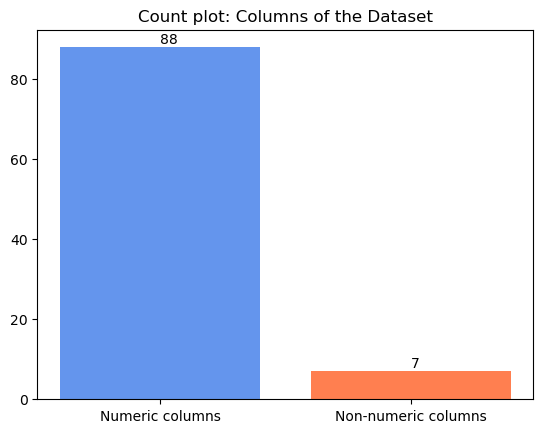

In [9]:
# function to plot the count of numeric vs non-numeric columns
def plot_column_counts(df):
    # get column names (numeric and non-numeric)
    numeric_columns = get_numerical_columns(df)
    non_numeric_columns = get_non_numerical_columns(df)
    
    # plot the bar chart and set title
    data = [('Numeric columns', len(numeric_columns)), ('Non-numeric columns', len(non_numeric_columns))]
    plt.bar(x=[x[0] for x in data ], height=[y[1] for y in data], color=['cornflowerblue', 'coral'])
    plt.title("Count plot: Columns of the Dataset")
    
    # annotate values above the bars
    max_y = max([y[1] for y in data])
    for i, (x, y) in enumerate(data):
        plt.annotate(str(y), (i, y + 0.01 * max_y))
    plt.show()

plot_column_counts(df)

Let's also start checking:
- __missing values__ overall and per column
- __unique values__ overall and per column

In [10]:
# function to check number & percentage of missing values
def check_overall_missing_values(df):
    mean = np.mean(df.isna().sum()) # calculate the mean of missing values from all columns
    median = np.median(df.isna().sum()) # calculate the median of missing values from all columns
    total = df.shape[0] - df.dropna().shape[0] # calculate the total rows with missing values
    # display the missing value metrics
    print(f"Average of Missing Values per column: {mean:.2f}")
    print(f"Median of Missing Values per column: {median:.0f}")
    print(f"% Average of Missing Values: {mean*100/df.shape[0]:.2f} %")
    print(f"% Median of Missing Values: {median*100/df.shape[0]:.2f} %")
    print(f"Total Missing Values on dataset: {total}")
    print(f"Total Missing Values on dataset: {total*100/df.shape[0]:.2f} %")
    
check_overall_missing_values(df)

Average of Missing Values per column: 1371.36
Median of Missing Values per column: 1266
% Average of Missing Values: 6.86 %
% Median of Missing Values: 6.33 %
Total Missing Values on dataset: 2923
Total Missing Values on dataset: 14.62 %


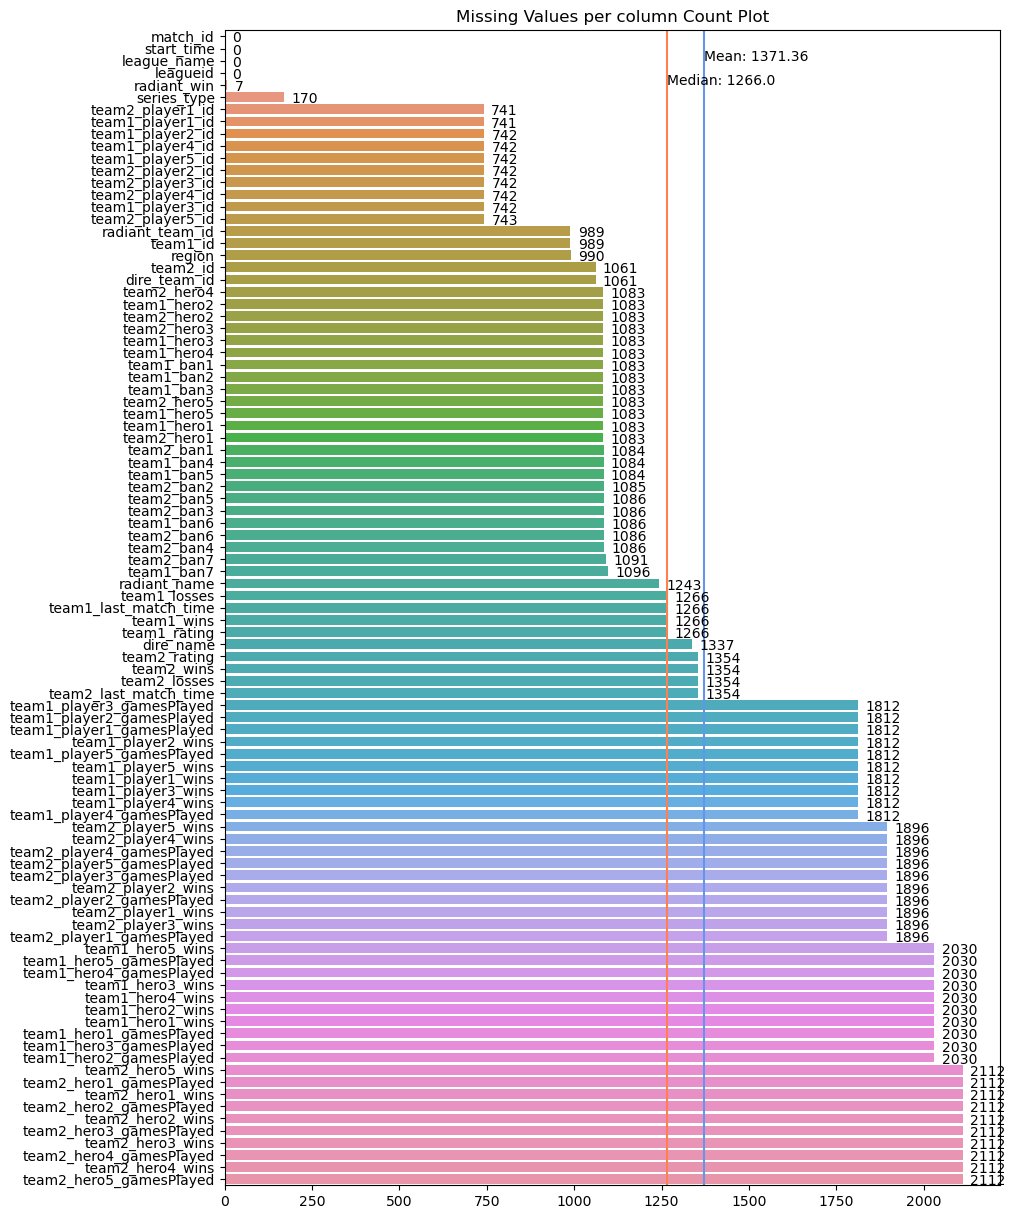

In [11]:
# function to plot missing values (or unique values) per column, with mean and median as vertical lines
def plot_column_values(df, counting='missing_values'):
    # set the plot size
    plt.figure(figsize=(10,15))
    # plot the bars of missing or unique values
    if counting == "missing_values":
        values = df.isna().sum().sort_values(ascending=True)
    elif counting == "unique_values":
        values = df.nunique().sort_values(ascending=True)
    column_names = values.index
    sns.barplot(x=values, y=column_names)

    # calculate & plot mean & median vertical lines, annotating corresponding values
    mean = np.mean(values)
    median = np.median(values)
    plt.axvline(x=mean, color='cornflowerblue')
    plt.axvline(x=median, color='coral')
    plt.annotate("Mean: "+str(round(mean, 2)), (0.5 + mean, 2))
    plt.annotate("Median: "+str(median), (0.5 + median, 4))

    # annotate missing values (or unique values) for each column
    max_x = max(values)
    for i, (missing_value, column) in enumerate(zip(values, column_names)):
        plt.annotate(str(missing_value), (missing_value + 0.01 * max_x, i + 0.5))
    plt.title(counting.replace("_"," ").title() + " per column Count Plot")
    plt.show()
    
plot_column_values(df, 'missing_values')

Some of the columns have __over 10% of missing values from the total rows__.

While the __mean and median of missing values__ per column lies around __5% of the total rows__.

In [12]:
# function to show number and % of duplicated rows
def check_duplicated_values(df):
    print("# Duplicated Values:", df.duplicated().sum())
    print("% Duplicated Values:", df.duplicated().mean() * 100, "%")

check_duplicated_values(df)

# Duplicated Values: 0
% Duplicated Values: 0.0 %


We __don't have duplicated values__, probably because of the 'match_id' column which are unique identifiers per match.

Let's check unique values.

In [13]:
# function to check number & percentage of unique values
def check_overall_unique_values(df):
    mean = np.mean(df.nunique())
    median = np.median(df.nunique())
    print(f"Average of Unique Values per column: {mean:.2f}")
    print(f"Median of Unique Values per column: {median:.0f}")
    print(f"% Average of Unique Values per column (vs total rows): {mean*100/df.shape[0]:.2f} %")
    print(f"% Median of Unique Values per column (vs total rows): {median*100/df.shape[0]:.2f} %")
        
check_overall_unique_values(df)

Average of Unique Values per column: 934.47
Median of Unique Values per column: 254
% Average of Unique Values per column (vs total rows): 4.67 %
% Median of Unique Values per column (vs total rows): 1.27 %


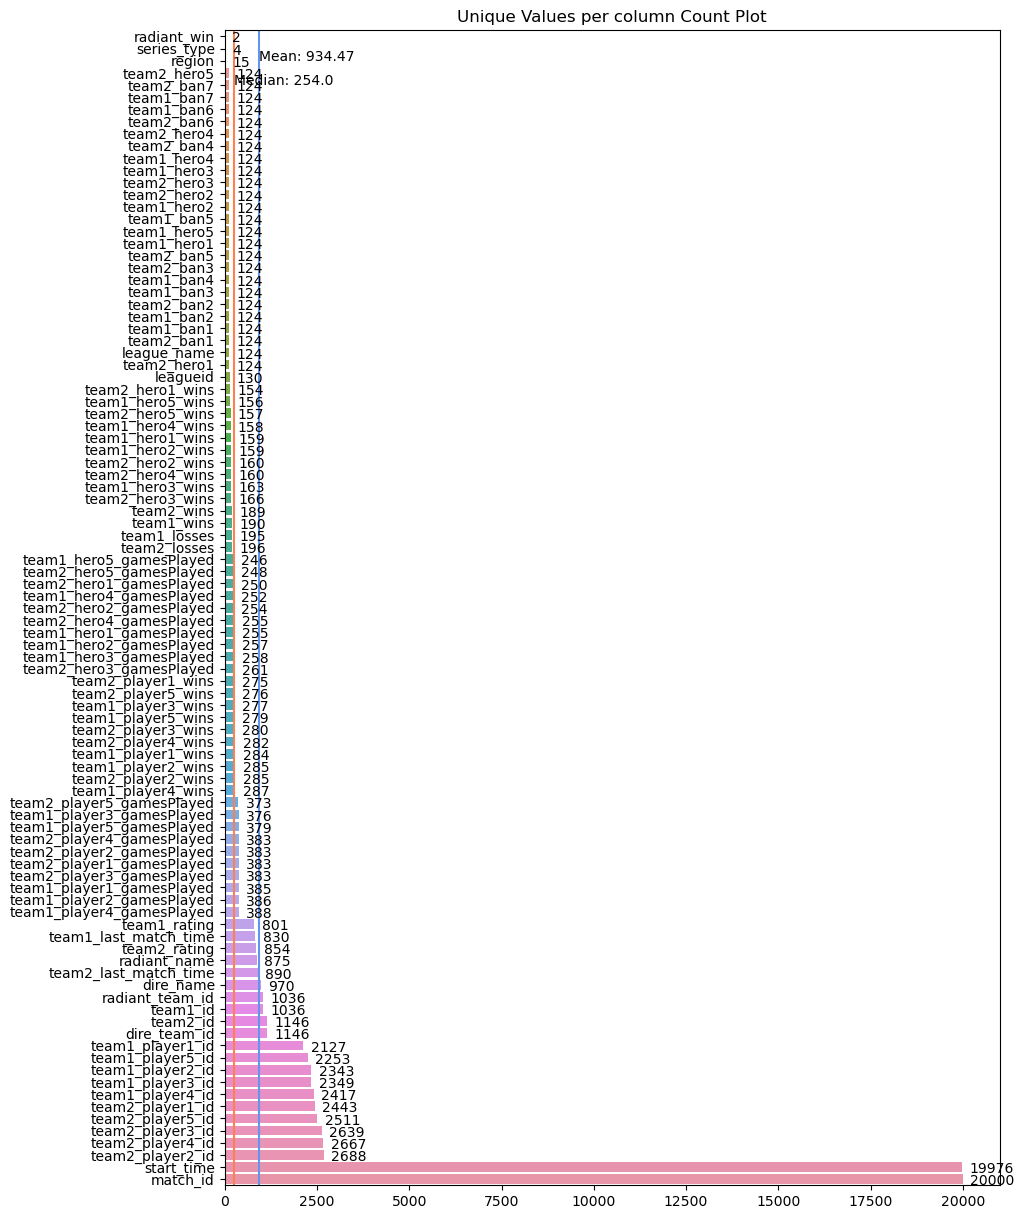

In [14]:
# use the same function to plot number of unique values per column
plot_column_values(df, 'unique_values')

Our __unique values per column__ (with the exception of start_time and match_id) lies __around 12.5% of the total rows__.

We notice that our __target has 2 possible unique values__ (win or loss). Let's plot its distribution.

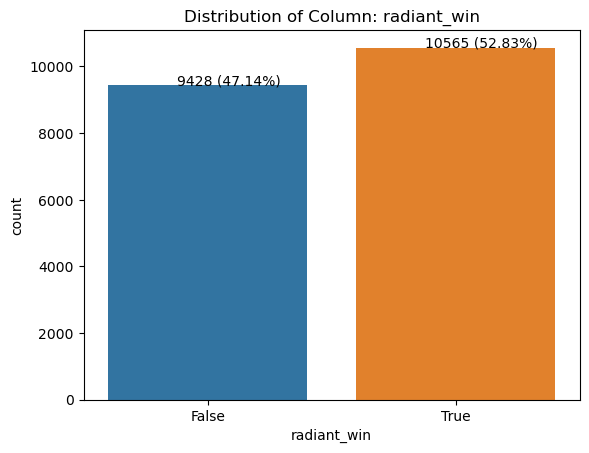

In [15]:
# function to plot the target column distribution
def plot_column_distribution_countplot(df, column):
    # countplot of the column parameter
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of Column: {column}')
    
    # annotate counts above each bar
    for i, value in enumerate(df[column].value_counts().sort_values()):
        percentage = round(value * 100 / df.shape[0], 2)
        plt.annotate(str(value) + f" ({percentage}%)", (i - 0.125, value + 5))
    plt.show()

plot_column_distribution_countplot(df, 'radiant_win')

Our target values look __balanced__, as both values have __nearly 50% each__.

Let's plot other columns distributions

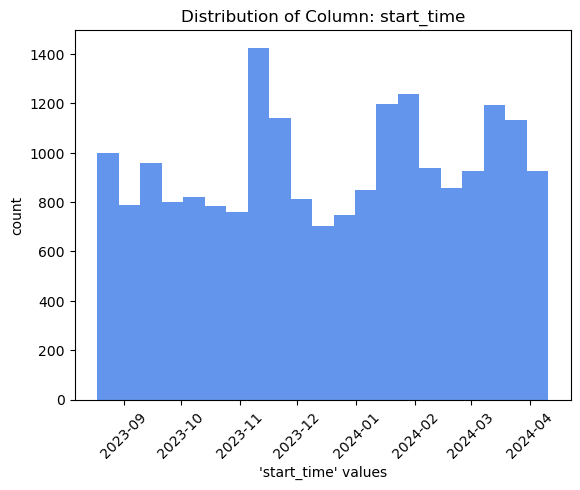

In [16]:
# function to plot a column distribution using histogram
def plot_column_distribution_histogram(df, column, rotation=0, bins=21, color='cornflowerblue'):
    # plot histogram using bins and color from parameters
    plt.hist(df[column], bins=bins, color=color)
    plt.xticks(rotation=rotation) # set the x labels rotation
    plt.xlabel("'" + column + "' values") # set axis labels and title
    plt.ylabel('count')
    plt.title(f'Distribution of Column: {column}')
    plt.show()
    
plot_column_distribution_histogram(df, 'start_time', rotation=45)

Column __'start_time'__ (starting time of the matches) has a similarity with a __uniform distribution__.

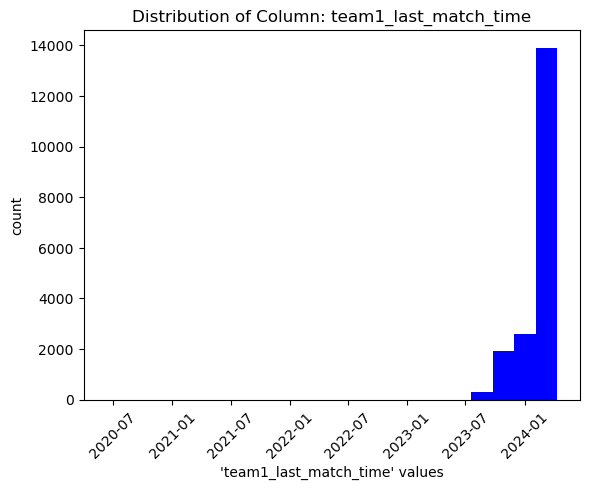

In [17]:
# plot the column 'team1_last_match_time' distribution
plot_column_distribution_histogram(df, 'team1_last_match_time', color='b', rotation=45)

The distribution of column 'team1_last_match_time' is __left-skewed__, with skew lower than zero.

This suggests most teams have played recently, while __some few outliers haven't played for months or even years__ (and their 1st match ever since, is one of the rows in our dataset).

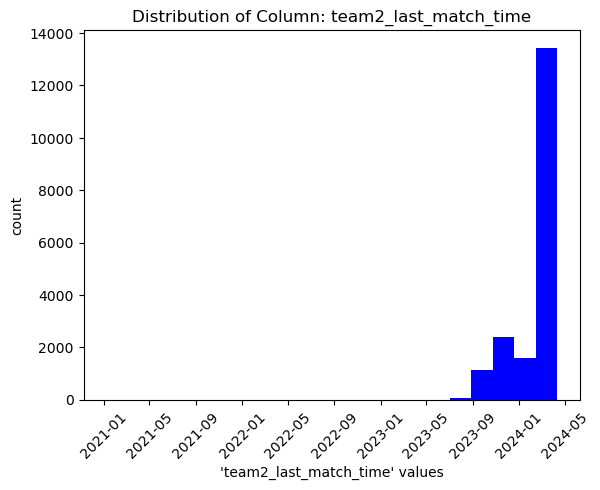

In [18]:
# plot the column 'team2_last_match_time' distribution
plot_column_distribution_histogram(df, 'team2_last_match_time', color='b', rotation=45)

Same happens the distribution of the column 'team1_last_match_time', it presents a skew lower than zero, or __left-skewed__.

Let's explore other columns using a bar plot.

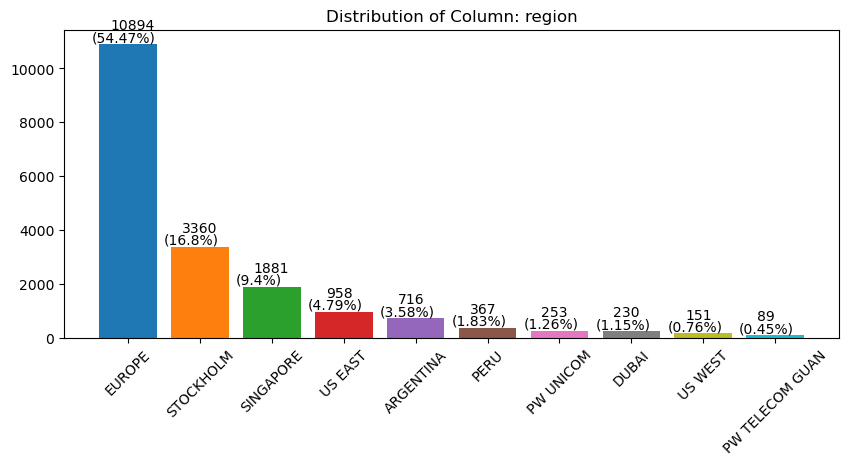

In [19]:
# function to plot the distribution of a column using bars
def plot_column_distribution_bar(df, target, rotation=0, constants={}, figsize=(10, 5), top_n=10):
    # set the frequencies and unique values of the column
    frequencies = list(df[target].value_counts())[:top_n]
    unique_values = df[target].value_counts().index[:top_n]
    
    # if 'constants' parameter was set, we map the unique values into some other values from the constants dictionary
    if constants != {}:
        unique_values = [constants[str(int(value))] for value in unique_values if not math.isnan(value)]
    unique_values = [value[:15] for value in unique_values] # limit the label to max 22 characters for plotting purposes (this doesn't affect the data)
    
    # set the plot size, title and label rotations, and plot the bars
    plt.figure(figsize=figsize)
    plt.bar(x=unique_values, height=frequencies, color=mcolors.TABLEAU_COLORS)
    plt.title(f'Distribution of Column: {target}')
    plt.xticks(rotation=rotation)
    
    # annotate frequencies and percentages above each bar
    max_y = max(frequencies)
    for i, (value, frequency) in enumerate(zip(unique_values, frequencies)):
        percentage = round(frequency * 100 / df.shape[0], 2)
        plt.annotate(str(frequency), (i - 0.25, frequency + max_y * 0.05))
        plt.annotate(f"({percentage}%)", (i - 0.5, frequency + max_y * 0.01))
    plt.show()

# set a dictionary to map the actual values to the corresponding regions
regions_constants = {"1":"US WEST","2":"US EAST","3":"EUROPE","5":"SINGAPORE","6":"DUBAI","7":"AUSTRALIA","8":"STOCKHOLM","9":"AUSTRIA","10":"BRAZIL","11":"SOUTHAFRICA","12":"PW TELECOM SHANGHAI","13":"PW UNICOM","14":"CHILE","15":"PERU","16":"INDIA","17":"PW TELECOM GUANGDONG","18":"PW TELECOM ZHEJIANG","19":"JAPAN","20":"PW TELECOM WUHAN","25":"PW UNICOM TIANJIN","37":"TAIWAN","38":"ARGENTINA"}
plot_column_distribution_bar(df, 'region', rotation=45, constants=regions_constants, figsize=(10, 4))

Most of the data (matches) are happening in __Europe (>54%)__ or __Stockholm (>16%)__ which is also located in Europe.

This may be due to recent tournaments happening in Europe and Stockholm, where most professional teams are playing.

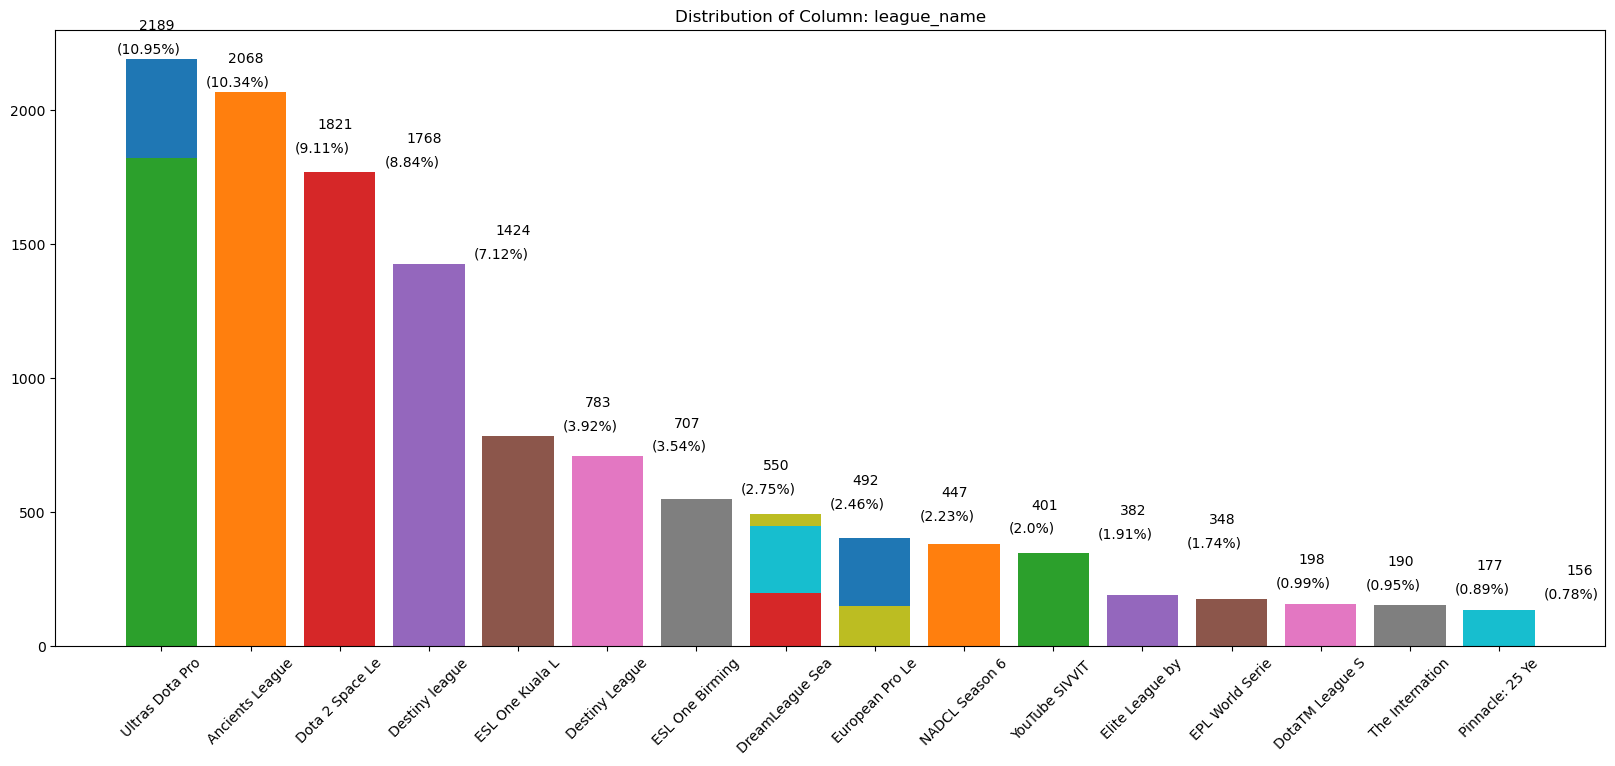

In [20]:
plot_column_distribution_bar(df, 'league_name', rotation=45, figsize=(20, 8), top_n=20)

For the 'league_name' column, the situation is similar, with __some few leagues having the most amount of matches (rows)__ of our dataset.

Let's explore the distribution of the teams metrics.

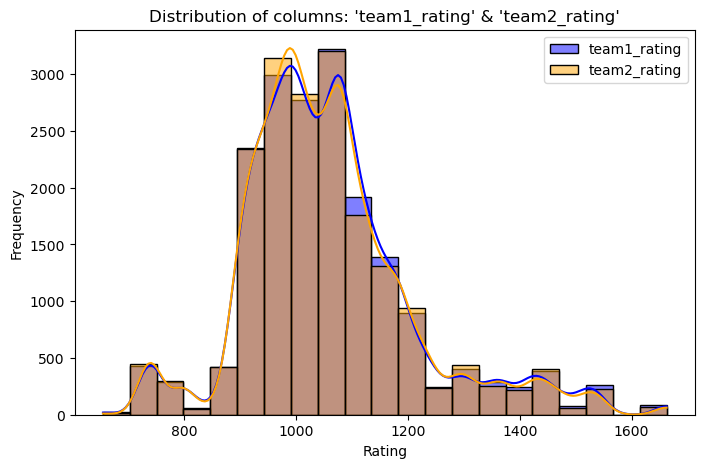

In [21]:
# create another function that uses seaborn to plot 2+ columns distribution
def plot_columns_distribution_histplot(df, columns, bins=21, colors=[], title="", xlabel=""):
    
    # plot a histogram per column
    plt.figure(figsize=(8, 5))
    for column, color in zip(columns, colors):
        sns.histplot(data=df, x=column, bins=bins, kde=True, label=column, color=color, palette='hls')
    
    # set title and labels
    plt.title("Distribution of columns: " + title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# plot distributions of the following columns
columns = ['team1_rating', 'team2_rating']
colors=['blue', 'orange']
title = "'team1_rating' & 'team2_rating'"
plot_columns_distribution_histplot(df, columns=columns, colors=colors, title=title, xlabel="Rating")

In [22]:
# calculate skewness of the following columns
print("Team 1 rating skewness:", df['team1_rating'].skew())
print("Team 2 rating skewness:", df['team2_rating'].skew())

Team 1 rating skewness: 0.9675019474869195
Team 2 rating skewness: 0.9567815628848432


The __rating__ distribution of the teams on both sides have __similar distributions__.

These ratings are also somewhat similar to a __normal distribution__.

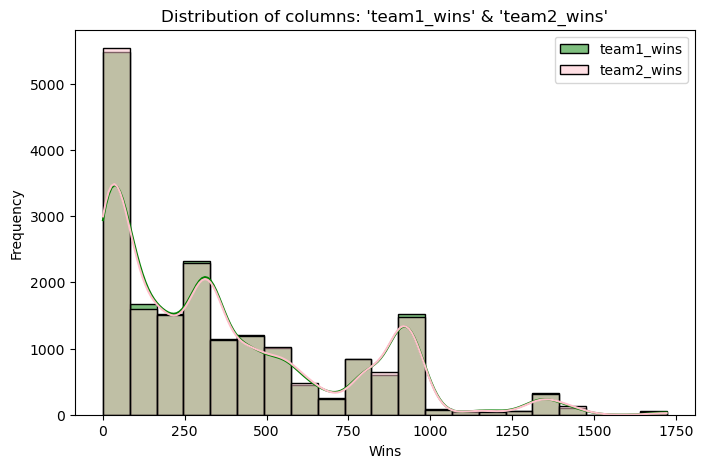

In [23]:
# plot distributions of the following columns
columns = ['team1_wins', 'team2_wins']
colors=['green', 'pink']
title = "'team1_wins' & 'team2_wins'"
plot_columns_distribution_histplot(df, columns=columns, colors=colors, title=title, xlabel="Wins")

In [24]:
# calculate skewness of the following columns
print(df['team1_wins'].skew())
print(df['team2_wins'].skew())

1.0409071664599885
1.0186743107939833


For each match, both teams have similar amount of previous wins.

Some __outlier teams have over 1000 previously won matches__.

__Distributions are right-skewed (>0)__ presenting a right-tail.

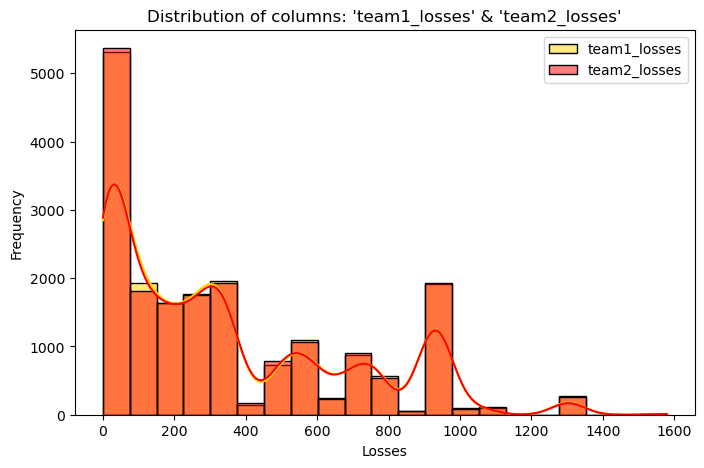

In [25]:
# plot distributions of the following columns
columns = ['team1_losses', 'team2_losses']
colors=['gold', 'red']
title = "'team1_losses' & 'team2_losses'"
plot_columns_distribution_histplot(df, columns=columns, colors=colors, title=title, xlabel="Losses")

In [26]:
# calculate skewness of the following columns
print(df['team1_losses'].skew())
print(df['team2_losses'].skew())

0.8965433650703697
0.8932557372873641


Similar situation with the teams losses.

__Distributions are right-skewed (>0)__ with some outlier teams that have lost over 1000 times.

Let's identify outliers by ploting boxplots.

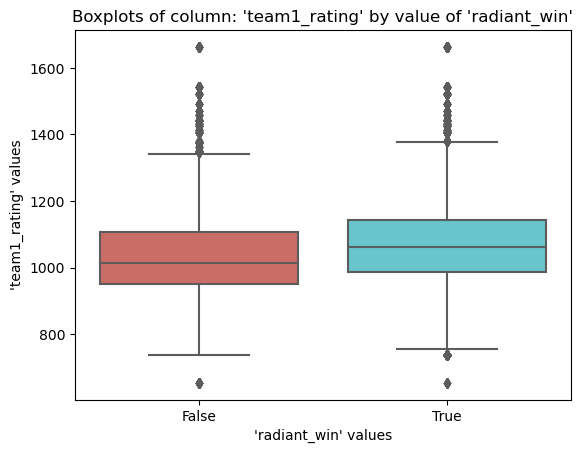

In [27]:
# function to plot boxplots per value of a column using seaborn
def plot_column_distribution_boxplot(df, colX, colY, palette='hls'):
    
    # plot the boxplot of a column Y per value of column X
    sns.boxplot(data=df, x=colX, y=colY, palette=palette)
    
    # set title and labels
    plt.xlabel("'"+colX+"' values")
    plt.ylabel("'"+colY+"' values")
    plt.title("Boxplots of column: '"+colY+"' by value of '"+colX+"'")
    plt.show()
    
# plot boxplots of 'team1_rating' per value of our target ('radiant_win')
plot_column_distribution_boxplot(df, 'radiant_win', 'team1_rating', palette='hls')

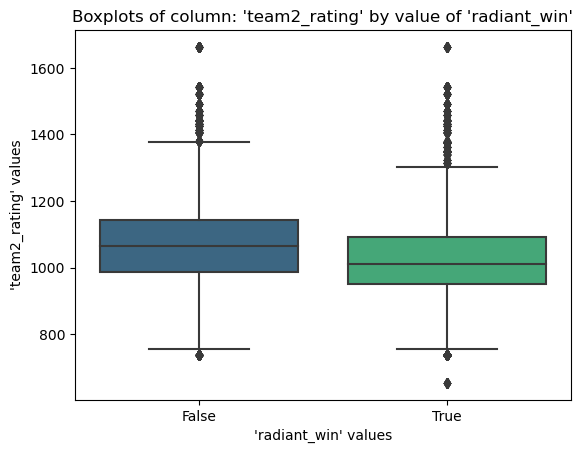

In [28]:
# plot boxplots of 'team2_rating' per value of our target ('radiant_win')
plot_column_distribution_boxplot(df, 'radiant_win', 'team2_rating', palette='viridis')

We have several outliers within the team ratings per target value. Most outliers have outstanding ratings.

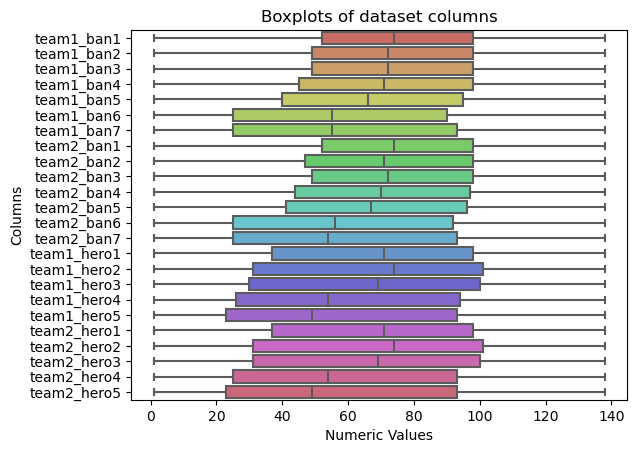

In [29]:
# function to plot boxplots from a set of columns using seaborn
def plot_columns_distribution_boxplot(df, palette='hls', xticks=0, orient="h"):
    # plot boxplots of an entire dataset
    sns.boxplot(data=df, palette=palette, orient=orient)
    
    # set title and labels depending if the boxplots are horizontal or vertical
    if orient == "v":
        plt.xlabel("Columns")
        plt.xticks(rotation=xticks)
        plt.ylabel("Numeric Values")
    else:
        plt.xlabel("Numeric Values")
        plt.ylabel("Columns")
    plt.title("Boxplots of dataset columns")
    plt.show()

# plot boxplots of the following columns
columns_chunk_0 = ['team1_ban1', 'team1_ban2', 'team1_ban3', 'team1_ban4', 'team1_ban5', 'team1_ban6', 'team1_ban7',
                   'team2_ban1', 'team2_ban2', 'team2_ban3', 'team2_ban4', 'team2_ban5', 'team2_ban6', 'team2_ban7']
columns_chunk_1 = ['team1_hero1', 'team1_hero2', 'team1_hero3', 'team1_hero4', 'team1_hero5',
                   'team2_hero1', 'team2_hero2', 'team2_hero3', 'team2_hero4', 'team2_hero5']
plot_columns_distribution_boxplot(df[columns_chunk_0 + columns_chunk_1], palette='hls')

Since the amount of heroes (playable characters) are predefined by the videogame, there are __no outliers in the hero/ban columns__.

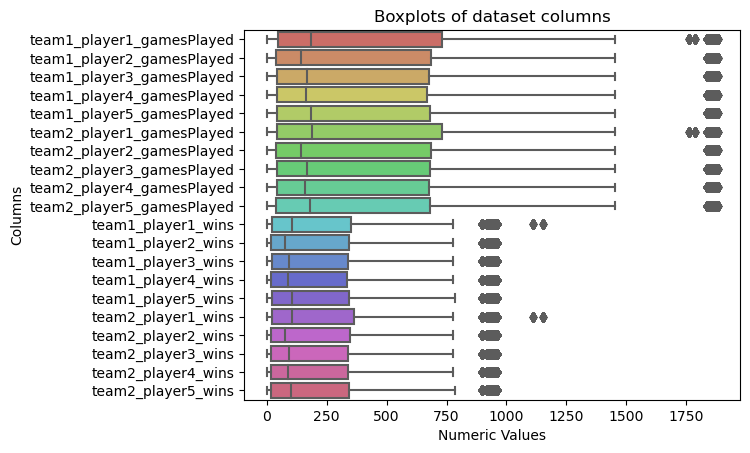

In [30]:
# plot boxplots of the following columns
columns_chunk_2 = ['team1_player1_gamesPlayed', 'team1_player2_gamesPlayed', 'team1_player3_gamesPlayed', 'team1_player4_gamesPlayed', 'team1_player5_gamesPlayed',
                   'team2_player1_gamesPlayed', 'team2_player2_gamesPlayed', 'team2_player3_gamesPlayed', 'team2_player4_gamesPlayed', 'team2_player5_gamesPlayed']
columns_chunk_3 = ['team1_player1_wins', 'team1_player2_wins', 'team1_player3_wins', 'team1_player4_wins', 'team1_player5_wins',
                   'team2_player1_wins', 'team2_player2_wins', 'team2_player3_wins', 'team2_player4_wins', 'team2_player5_wins']
plot_columns_distribution_boxplot(df[columns_chunk_2 + columns_chunk_3], palette='hls')

We have various __outlier players__ with __outstanding number of games played__ (with their current teams) and __won matches__ (with their current teams).

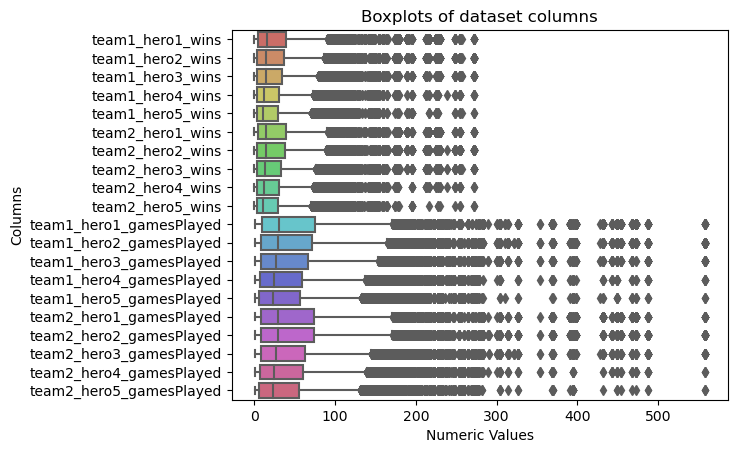

In [31]:
# plot boxplots of the following columns
columns_chunk_4 = ['team1_hero1_wins', 'team1_hero2_wins', 'team1_hero3_wins', 'team1_hero4_wins', 'team1_hero5_wins',
                   'team2_hero1_wins', 'team2_hero2_wins', 'team2_hero3_wins', 'team2_hero4_wins', 'team2_hero5_wins']
columns_chunk_5 = ['team1_hero1_gamesPlayed', 'team1_hero2_gamesPlayed', 'team1_hero3_gamesPlayed', 'team1_hero4_gamesPlayed', 'team1_hero5_gamesPlayed',
                   'team2_hero1_gamesPlayed', 'team2_hero2_gamesPlayed', 'team2_hero3_gamesPlayed', 'team2_hero4_gamesPlayed', 'team2_hero5_gamesPlayed']
plot_columns_distribution_boxplot(df[columns_chunk_4 + columns_chunk_5], palette='hls')

There are also __even more outliers__ about the __team heroes (matches played and won matches)__.

Let's find the correlation between our columns and our target using a __heatmap__.

In [32]:
# function to get the correlation matrix between a dataframe and a given target
# top_n: > 0 will return the 'top_n' most positive correlated features to the target
# < 0 will return the 'top_n' most negative correlated features to the target
def get_target_top_correlated_features(df, target, top_n=10, map_target=True):
    df_corr = df.copy()
    
    # mapping target values to integers if required
    if map_target:
        df_corr[target] = df_corr[target].map({True:1, False:0})
        
    # select only numerical features
    df_corr = df_corr.select_dtypes(include=['number'])
    
    # calculate correlation matrix and descendingly sorted
    correlation_matrix = df_corr.corr()
    correlation_target = correlation_matrix[[target]].sort_values(by=target, ascending=False)
    
    # return only top n features (positive or negative)
    return correlation_target[:top_n] if top_n > 0 else correlation_target[top_n:]

# get top 10 positive correlated features to the target
get_target_top_correlated_features(df, 'radiant_win', top_n=10)

radiant_win
radiant_win            1.000000
team1_rating           0.130883
team1_hero5_wins       0.047514
team1_hero3_wins       0.040332
team1_hero4_wins       0.040044
team1_wins             0.032190
region                 0.031663
team1_hero2_wins       0.026080
leagueid               0.021026
team1_player1_wins     0.019188

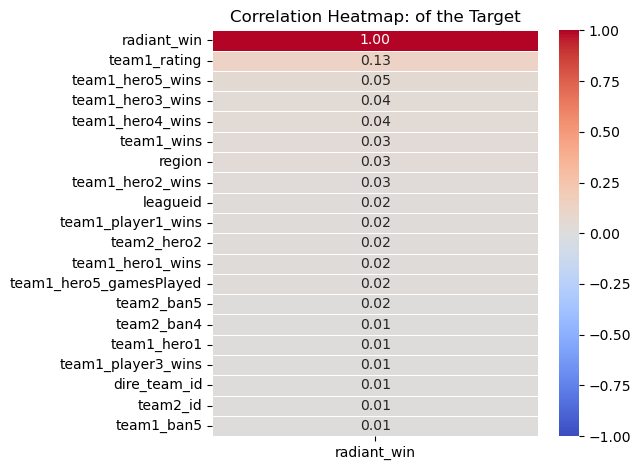

In [33]:
# function to plot a heatmap give a correlation matrix
def plot_heatmap(matrix, xticks=0, annot=True, title='of the Target'):
    # plot the heatmap
    sns.heatmap(matrix, annot=annot, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    
    # set title and labels
    plt.title('Correlation Heatmap: ' + title)
    plt.xticks(rotation=xticks)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# plot heatmap of top 20 positive correlated features (to the target)
correlation_matrix = get_target_top_correlated_features(df, 'radiant_win', top_n=20)
plot_heatmap(correlation_matrix)

Our __top feature roughly have 13% of positive correlation to our target__.

This is because all of these features are pre-match data (available data before the match even starts).

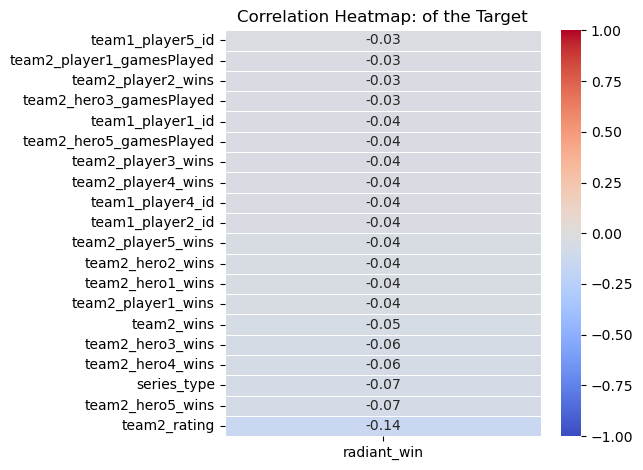

In [34]:
# plot heatmap of top 20 NEGATIVE correlated features (to the target)
correlation_matrix = get_target_top_correlated_features(df, 'radiant_win', top_n=-20)
plot_heatmap(correlation_matrix)

Our top negative correlated features also have __less than 15% negative correlation to our target.__

### 2. Data Pre-processing
- __missing values__
- __duplicates__
- __detect outliers & treatment__

__Dealing with missing values__

Let's perform a omission technique for 3 main reasons:
- It won't be appropriate to impute missing ID values (from teams, heroes, or players) with a centraly tendency measurement because they are unique identifiers.
- More data is available using the API, so if we needed more rows even after dropping missing values, we could just generate more real-world data using the API.
- They represent a relatively small chunk (< 15%) of the entire dataset.

In [35]:
# checking shape and missing values before omission
check_overall_missing_values(df)
display_shape_and_colnames(df, colnames=False)

Average of Missing Values per column: 1371.36
Median of Missing Values per column: 1266
% Average of Missing Values: 6.86 %
% Median of Missing Values: 6.33 %
Total Missing Values on dataset: 2923
Total Missing Values on dataset: 14.62 %
# Rows: 20000
# Columns: 95


In [36]:
# drop missing values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [37]:
# checking shape and missing values AFTER omission
check_overall_missing_values(df)
display_shape_and_colnames(df, colnames=False)

Average of Missing Values per column: 0.00
Median of Missing Values per column: 0
% Average of Missing Values: 0.00 %
% Median of Missing Values: 0.00 %
Total Missing Values on dataset: 0
Total Missing Values on dataset: 0.00 %
# Rows: 17077
# Columns: 95


After applying omission to the missing values we remained with 17k rows.

__Dealing with duplicates__

We don't have duplcated rows due to the unique match identifier column 'match_id'.

In [38]:
check_duplicated_values(df)

# Duplicated Values: 0
% Duplicated Values: 0.0 %


__Detect Outliers and Outlier treatment__

Let's detect outliers with the 1.5*IQR rule

In [39]:
# function to get column outliers outside the 1.5*IQR range
def get_column_outliers(df, column, iqr_factor=1.5, return_indexes=True, return_lh=False,  print_=False):
    # implement the 1.5*IQR rule to detect outliers from the dataset column
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - iqr_factor * IQR
    upper = q3 + iqr_factor * IQR
    if return_lh: return lower, upper
    
    # print lowest and highest value from the 1.5*IQR
    if print_:
        print(f"Column '{column}' outliers:")
        print("Lowest value above outliers:\t", lower)
        print("Highest value below outliers:\t", upper)
    
    # save outliers outside that range and return them as dataframe (or indexes)
    outliers = [index for index, value in df[column].items() if value < lower or value > upper]
    if return_indexes: return outliers
    return df.loc[outliers]

# testing outlier detection on one column
get_column_outliers(df, 'team1_rating', return_indexes=False, print_=True)[['team1_rating']]

Column 'team1_rating' outliers:
Lowest value above outliers:	 717.8025
Highest value below outliers:	 1368.0065000000002


team1_rating
0           1439.95
2           1521.52
8           1412.25
11          1491.47
12          1412.25
...             ...
16990       1456.81
16992       1469.74
16995       1540.62
17034       1380.60
17068       1380.60

[1081 rows x 1 columns]

In [40]:
# function to identify the columns with outliers (outside 1.5*IQR range)
def get_columns_with_outliers(df):
    # identify numeric columns and initialize variables
    numeric_columns = get_numerical_columns(df)
    outlier_columns = []
    text = ""
    
    # loop through the numeric columns
    for column in numeric_columns:
        outliers = get_column_outliers(df, column) # identify outliers
        if(len(outliers) == 0): continue
        
        # display information (column name, number of outliers, and % of outliers with respect to total rows)
        percentage = round(len(outliers)*100 / df.shape[0], 2)
        text += f"'{column}'" + '-'*(30-len(column)) + f"> {len(outliers):3} outliers ({percentage:.2f} %)\n"
        
        outlier_columns.append(column) # save column outliers
    print("# Columns with outliers:", len(outlier_columns))
    print(text)
    return outlier_columns # return columns with outliers
    
columns_with_outliers = get_columns_with_outliers(df)

# Columns with outliers: 53
'radiant_team_id'---------------> 1455 outliers (8.52 %)
'dire_team_id'------------------> 1534 outliers (8.98 %)
'leagueid'----------------------> 2470 outliers (14.46 %)
'series_type'-------------------> 1522 outliers (8.91 %)
'region'------------------------> 1186 outliers (6.95 %)
'team1_id'----------------------> 1455 outliers (8.52 %)
'team1_rating'------------------> 1081 outliers (6.33 %)
'team1_wins'--------------------> 474 outliers (2.78 %)
'team1_losses'------------------>  10 outliers (0.06 %)
'team2_id'----------------------> 1534 outliers (8.98 %)
'team2_rating'------------------> 982 outliers (5.75 %)
'team2_wins'--------------------> 460 outliers (2.69 %)
'team2_losses'------------------>  16 outliers (0.09 %)
'team1_player1_gamesPlayed'-----> 2061 outliers (12.07 %)
'team1_player1_wins'------------> 105 outliers (0.61 %)
'team1_player2_gamesPlayed'-----> 2062 outliers (12.07 %)
'team1_player2_wins'------------> 2062 outliers (12.07 %)
'team

We can't do anything about the __ID columns outliers__ as they __are unique identifiers__, so let's remove them from our identified outlier columns.

__'series_type' and 'region' are categorical columns__, let's also remove them from the outlier columns.

In [41]:
# remove id columns from outlier identification
columns_with_id = [col for col in columns_with_outliers if 'id' in col]
columns_with_outliers = [col for col in columns_with_outliers if col not in columns_with_id]

# remove specific columns from outlier identification
columns_with_outliers = [col for col in columns_with_outliers if col not in ['series_type', 'region', 'team1_last_match_time', 'team2_last_match_time']]
print("# Columns with outliers:", len(columns_with_outliers))
columns_with_outliers

# Columns with outliers: 46


['team1_rating',
 'team1_wins',
 'team1_losses',
 'team2_rating',
 'team2_wins',
 'team2_losses',
 'team1_player1_gamesPlayed',
 'team1_player1_wins',
 'team1_player2_gamesPlayed',
 'team1_player2_wins',
 'team1_player3_gamesPlayed',
 'team1_player3_wins',
 'team1_player4_gamesPlayed',
 'team1_player4_wins',
 'team1_player5_gamesPlayed',
 'team1_player5_wins',
 'team2_player1_gamesPlayed',
 'team2_player1_wins',
 'team2_player2_gamesPlayed',
 'team2_player2_wins',
 'team2_player3_gamesPlayed',
 'team2_player3_wins',
 'team2_player4_gamesPlayed',
 'team2_player4_wins',
 'team2_player5_gamesPlayed',
 'team2_player5_wins',
 'team1_hero1_gamesPlayed',
 'team1_hero1_wins',
 'team1_hero2_gamesPlayed',
 'team1_hero2_wins',
 'team1_hero3_gamesPlayed',
 'team1_hero3_wins',
 'team1_hero4_gamesPlayed',
 'team1_hero4_wins',
 'team1_hero5_gamesPlayed',
 'team1_hero5_wins',
 'team2_hero1_gamesPlayed',
 'team2_hero1_wins',
 'team2_hero2_gamesPlayed',
 'team2_hero2_wins',
 'team2_hero3_gamesPlayed',
 

We are left with 46 columns with outliers.

Let's treat their outliers using some techniques.

__We will NOT apply trimming to our outliers because we already lost a chunk of rows during the missing values omission.__

Let's try the 2 remaining techniques:
- __Flooring & Capping__
- __Log Transformation__

In [42]:
df_saved = df.copy() # saving a copy of the dataset

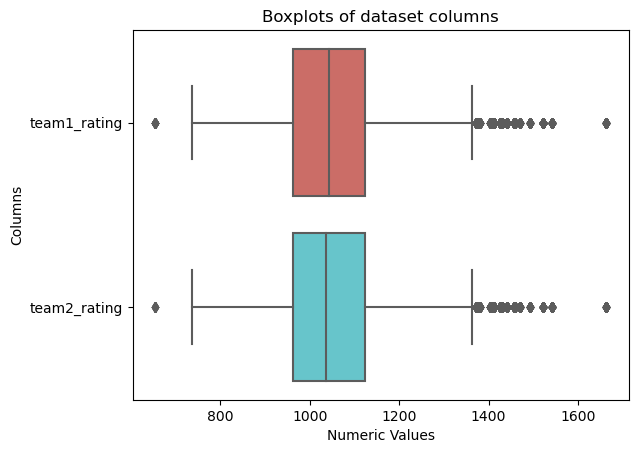

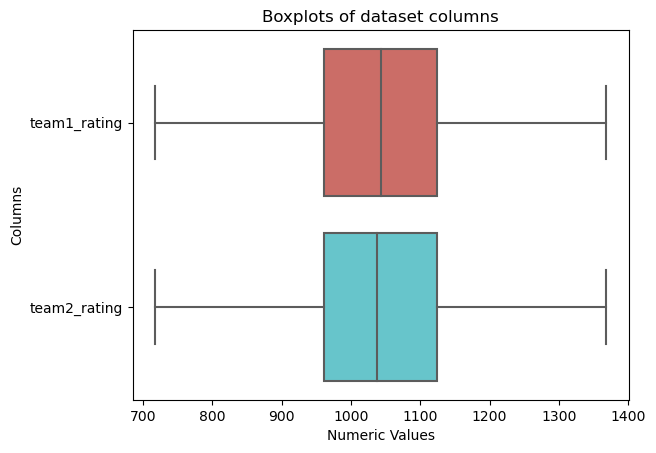

In [43]:
# apply flooring and capping technique on dataset
def apply_flooring_capping(df_original):
    # apply on a copy of the dataset
    df = df_original.copy()
    # loop through all columns
    for column in df.columns.to_list():
        # calculate floor and ceiling and get indexes of the outliers
        lowest, highest = get_column_outliers(df, column, return_lh=True)
        outlier_indexes = get_column_outliers(df, column, return_indexes=True)
        
        # floor and cap the outliers (looping through indexes)
        for index in outlier_indexes:
            current_value = df.iloc[index, df.columns.get_loc(column)]
            df.iloc[index, df.columns.get_loc(column)] = lowest if current_value < lowest else highest
    return df

# apply flooring & capping on following columns
columns_chunk1 = ['team1_rating', 'team2_rating']
plot_columns_distribution_boxplot(df[columns_chunk1], palette='hls') # boxplots before treating outliers
df[columns_chunk1] = apply_flooring_capping(df[columns_chunk1]) # treat outliers
plot_columns_distribution_boxplot(df[columns_chunk1], palette='hls') # boxplots after treating outliers

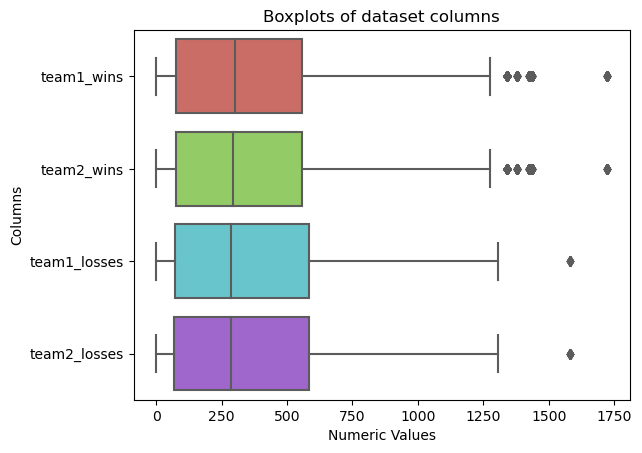

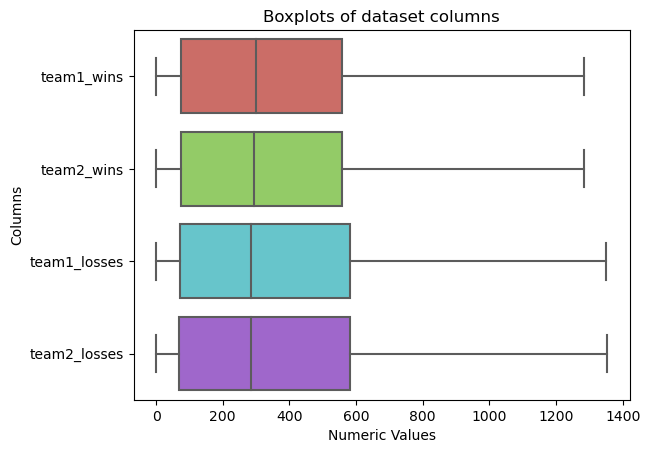

In [44]:
# apply flooring & capping on following columns
columns_chunk2 = ['team1_wins', 'team2_wins', 'team1_losses', 'team2_losses']
plot_columns_distribution_boxplot(df[columns_chunk2], palette='hls') # boxplots before treating outliers
df[columns_chunk2] = apply_flooring_capping(df[columns_chunk2]) # treat outliers
plot_columns_distribution_boxplot(df[columns_chunk2], palette='hls') # boxplots after treating outliers

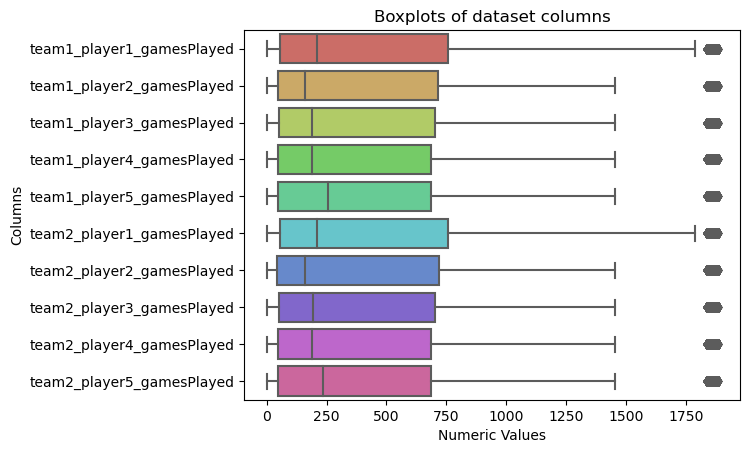

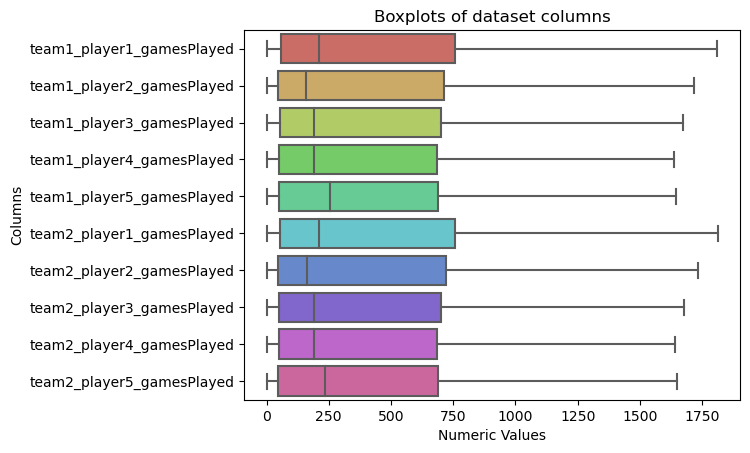

In [45]:
# apply flooring & capping on following columns
columns_chunk3 = ['team1_player1_gamesPlayed',
 'team1_player2_gamesPlayed',
 'team1_player3_gamesPlayed',
 'team1_player4_gamesPlayed',
 'team1_player5_gamesPlayed',
 'team2_player1_gamesPlayed',
 'team2_player2_gamesPlayed',
 'team2_player3_gamesPlayed',
 'team2_player4_gamesPlayed',
 'team2_player5_gamesPlayed']
plot_columns_distribution_boxplot(df[columns_chunk3], palette='hls') # boxplots before treating outliers
df[columns_chunk3] = apply_flooring_capping(df[columns_chunk3]) # treat outliers
plot_columns_distribution_boxplot(df[columns_chunk3], palette='hls') # boxplots after treating outliers

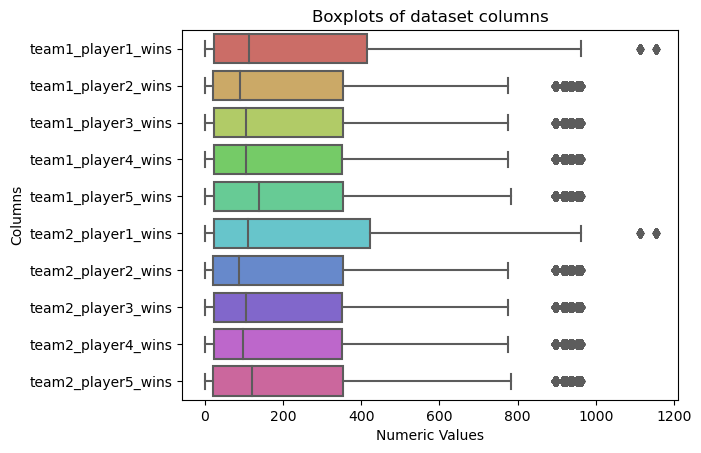

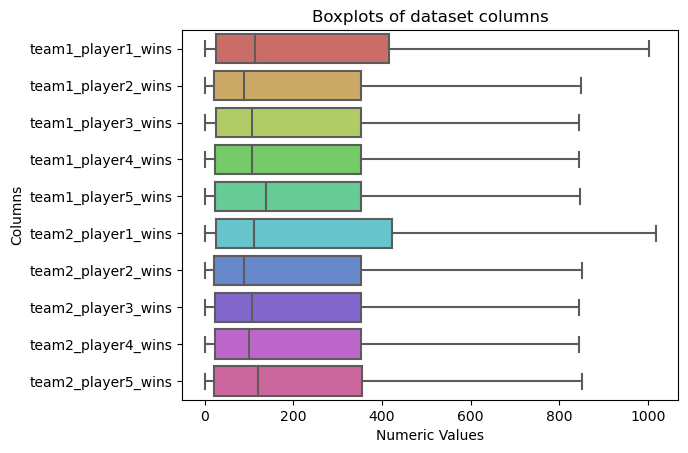

In [46]:
# apply flooring & capping on following columns
columns_chunk4 = ['team1_player1_wins',
 'team1_player2_wins',
 'team1_player3_wins',
 'team1_player4_wins',
 'team1_player5_wins',
 'team2_player1_wins',
 'team2_player2_wins',
 'team2_player3_wins',
 'team2_player4_wins',
 'team2_player5_wins']
plot_columns_distribution_boxplot(df[columns_chunk4], palette='hls') # boxplots before treating outliers
df[columns_chunk4] = apply_flooring_capping(df[columns_chunk4]) # treat outliers
plot_columns_distribution_boxplot(df[columns_chunk4], palette='hls') # boxplots after treating outliers

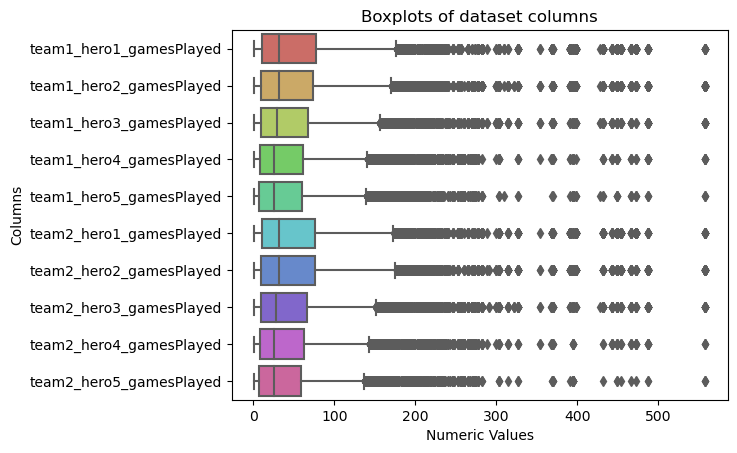

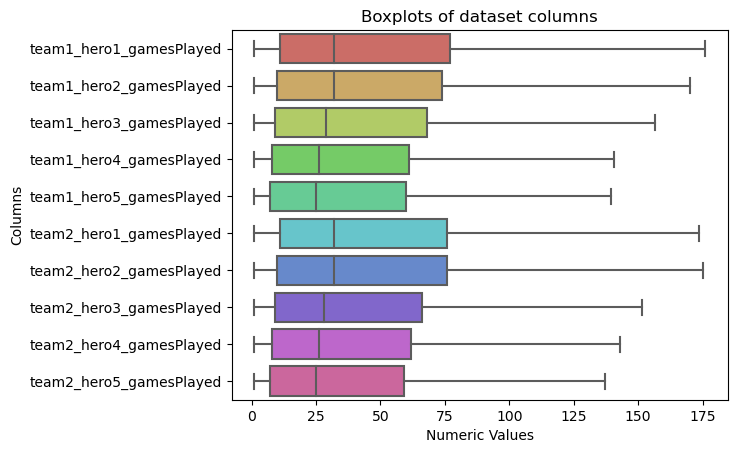

In [47]:
# apply flooring & capping on following columns
columns_chunk5 = ['team1_hero1_gamesPlayed',
 'team1_hero2_gamesPlayed',
 'team1_hero3_gamesPlayed',
 'team1_hero4_gamesPlayed',
 'team1_hero5_gamesPlayed',
 'team2_hero1_gamesPlayed',
 'team2_hero2_gamesPlayed',
 'team2_hero3_gamesPlayed',
 'team2_hero4_gamesPlayed',
 'team2_hero5_gamesPlayed']
plot_columns_distribution_boxplot(df[columns_chunk5], palette='hls') # boxplots before treating outliers
df[columns_chunk5] = apply_flooring_capping(df[columns_chunk5]) # treat outliers
plot_columns_distribution_boxplot(df[columns_chunk5], palette='hls') # boxplots after treating outliers

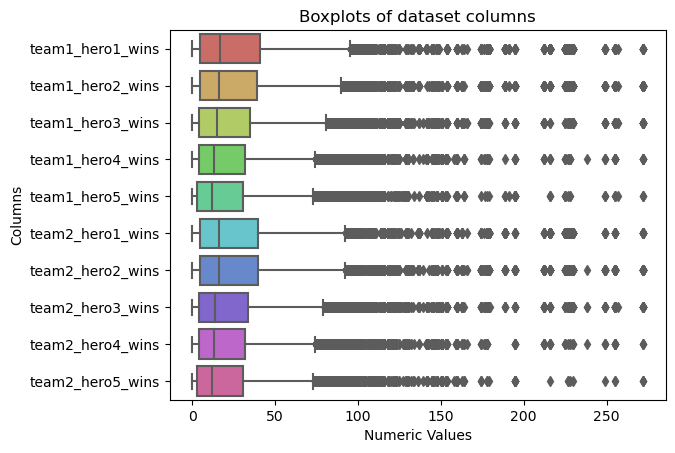

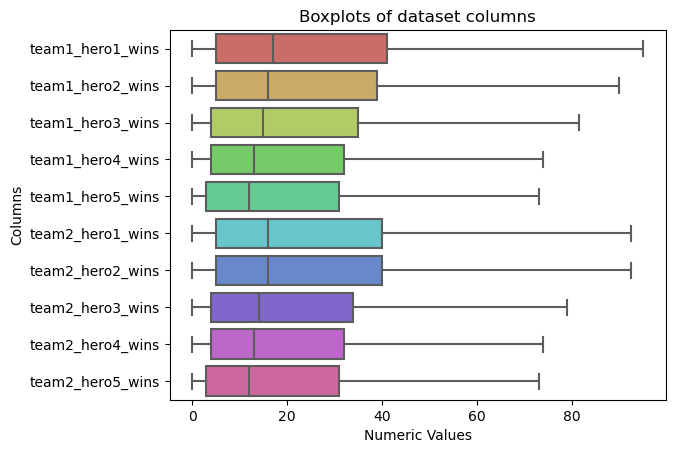

In [48]:
# apply flooring & capping on following columns
columns_chunk6 = ['team1_hero1_wins',
 'team1_hero2_wins',
 'team1_hero3_wins',
 'team1_hero4_wins',
 'team1_hero5_wins',
 'team2_hero1_wins',
 'team2_hero2_wins',
 'team2_hero3_wins',
 'team2_hero4_wins',
 'team2_hero5_wins']
plot_columns_distribution_boxplot(df[columns_chunk6], palette='hls') # boxplots before treating outliers
df[columns_chunk6] = apply_flooring_capping(df[columns_chunk6]) # treat outliers
plot_columns_distribution_boxplot(df[columns_chunk6], palette='hls') # boxplots after treating outliers

In [49]:
get_columns_with_outliers(df[columns_with_outliers])

# Columns with outliers: 0



[]

We have seen the results with __flooring & capping__ technique, we are left with __zero original outliers__ as they are all __set into the floor or ceiling values__.

Now let's try using a __log transformation__ and compare results.

In [50]:
df = df_saved.copy() # load the copy of the dataset before flooring & capping

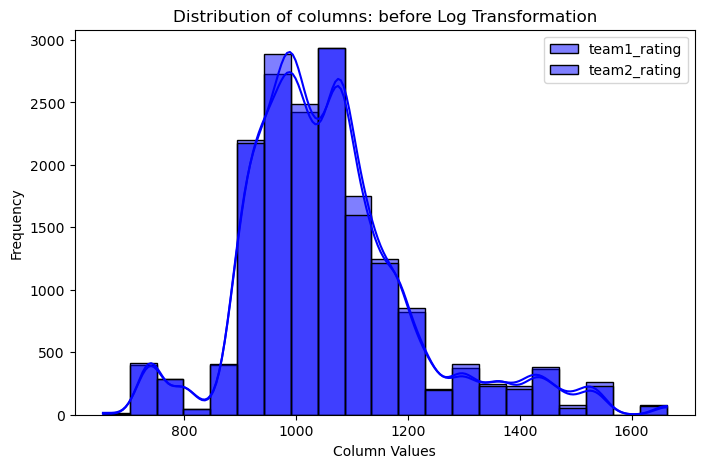

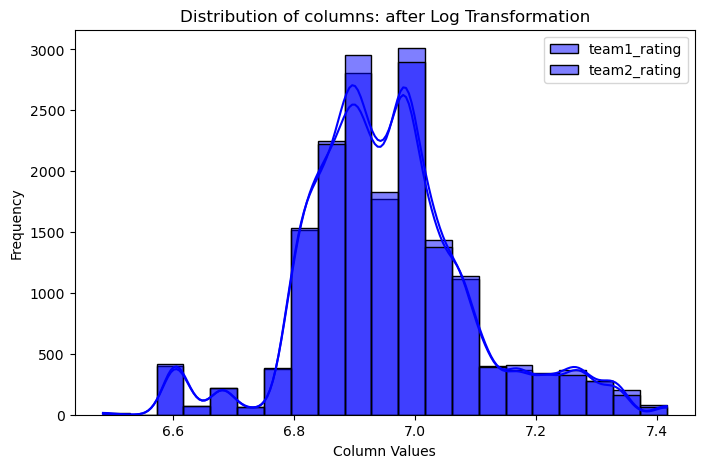

In [51]:
# apply log transformation technique on dataset
def apply_log_transformation(df_original):
    # apply on a copy of the dataset
    df = df_original.copy()
    # apply log to columns
    for column in df.columns.to_list():
        df[column] = df[column].map(lambda value : np.log(value) if value > 0 else 0)
    return df

# apply log transformation on 1st chunk of columns
colors = ['blue' for _ in range(len(columns_chunk1))]
plot_columns_distribution_histplot(df, columns=columns_chunk1, colors=colors, xlabel="Column Values", title='before Log Transformation') # boxplots before treating outliers
df[columns_chunk1] = apply_log_transformation(df[columns_chunk1]) # treat outliers
plot_columns_distribution_histplot(df, columns=columns_chunk1, colors=colors, xlabel="Column Values", title='after Log Transformation') # boxplots after treating outliers

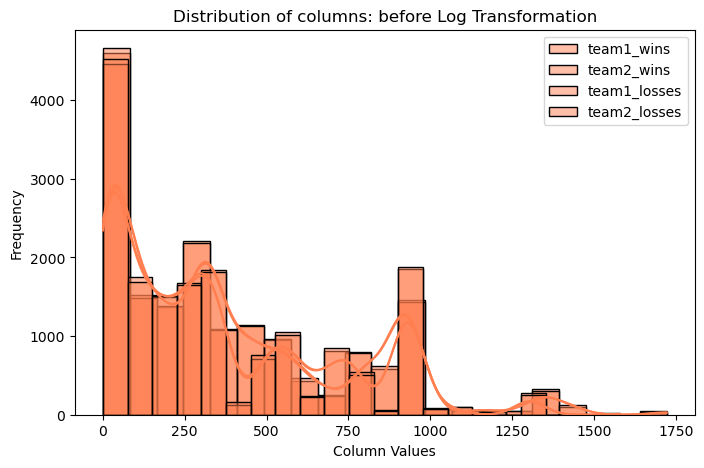

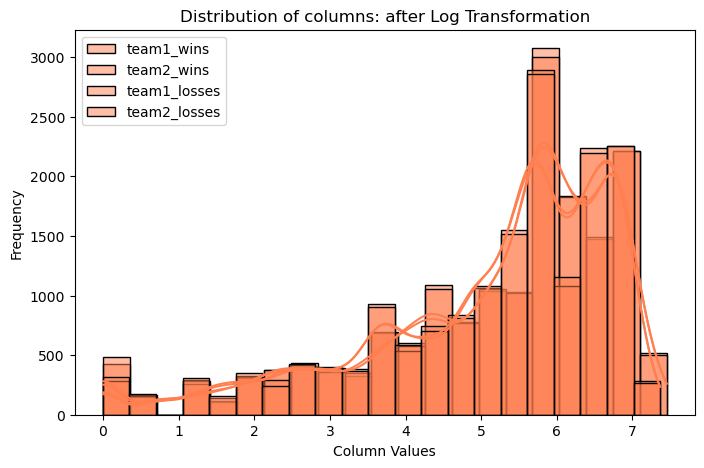

In [52]:
# apply log transformation on 2nd chunk of columns
colors = ['coral' for _ in range(len(columns_chunk2))]
plot_columns_distribution_histplot(df, columns=columns_chunk2, colors=colors, xlabel="Column Values", title='before Log Transformation') # boxplots before treating outliers
df[columns_chunk2] = apply_log_transformation(df[columns_chunk2]) # treat outliers
plot_columns_distribution_histplot(df, columns=columns_chunk2, colors=colors, xlabel="Column Values", title='after Log Transformation') # boxplots after treating outliers

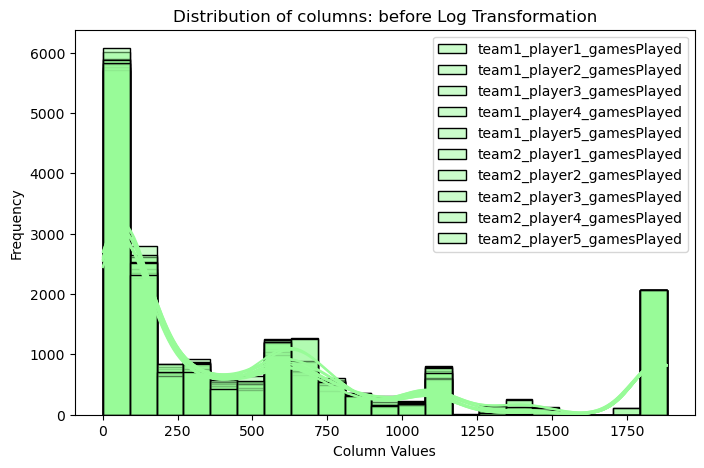

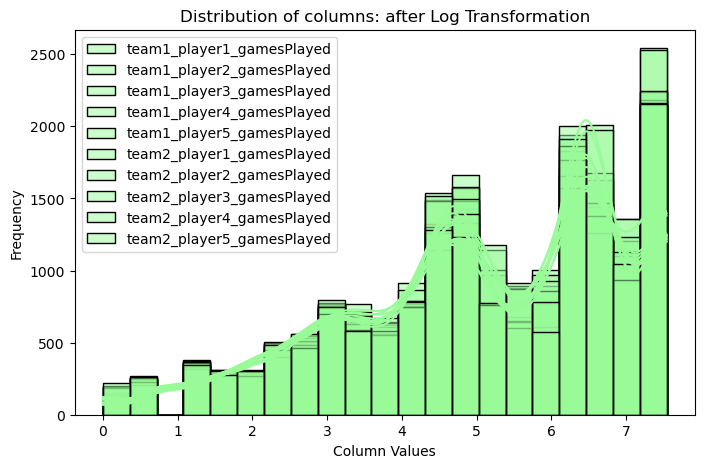

In [53]:
# apply log transformation on 3rd chunk of columns
colors = ['palegreen' for _ in range(len(columns_chunk3))]
plot_columns_distribution_histplot(df, columns=columns_chunk3, colors=colors, xlabel="Column Values", title='before Log Transformation') # boxplots before treating outliers
df[columns_chunk3] = apply_log_transformation(df[columns_chunk3]) # treat outliers
plot_columns_distribution_histplot(df, columns=columns_chunk3, colors=colors, xlabel="Column Values", title='after Log Transformation') # boxplots after treating outliers

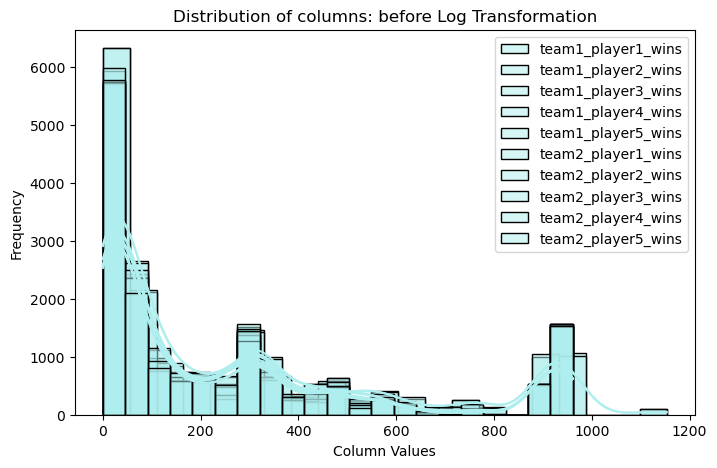

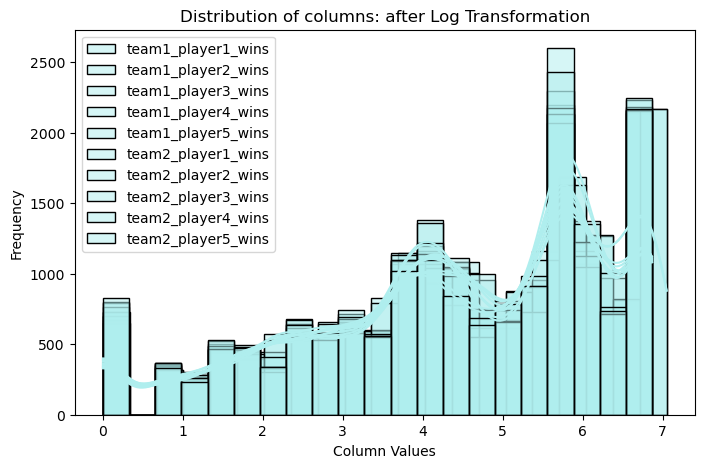

In [54]:
# apply log transformation on 4th chunk of columns
colors = ['paleturquoise' for _ in range(len(columns_chunk4))]
plot_columns_distribution_histplot(df, columns=columns_chunk4, colors=colors, xlabel="Column Values", title='before Log Transformation') # boxplots before treating outliers
df[columns_chunk4] = apply_log_transformation(df[columns_chunk4]) # treat outliers
plot_columns_distribution_histplot(df, columns=columns_chunk4, colors=colors, xlabel="Column Values", title='after Log Transformation') # boxplots after treating outliers

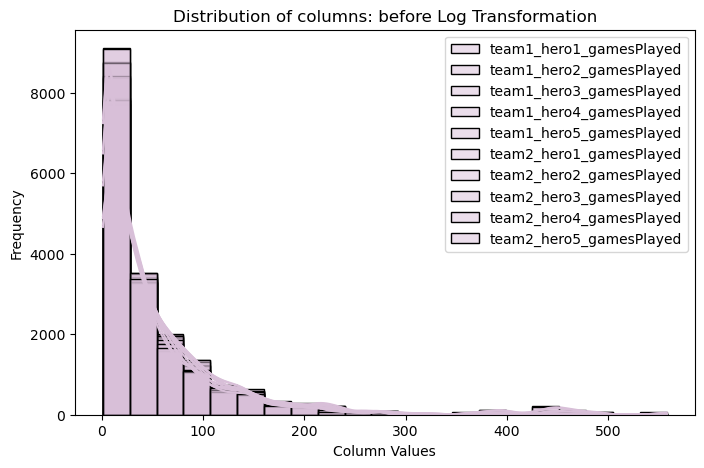

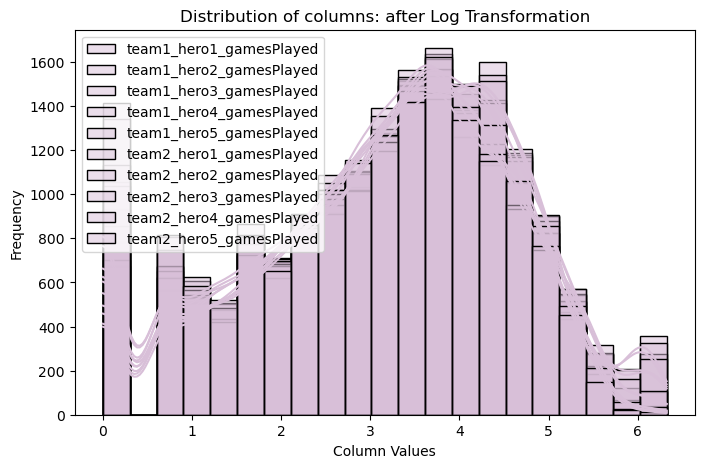

In [55]:
# apply log transformation on 5th chunk of columns
colors = ['thistle' for _ in range(len(columns_chunk5))]
plot_columns_distribution_histplot(df, columns=columns_chunk5, colors=colors, xlabel="Column Values", title='before Log Transformation') # boxplots before treating outliers
df[columns_chunk5] = apply_log_transformation(df[columns_chunk5]) # treat outliers
plot_columns_distribution_histplot(df, columns=columns_chunk5, colors=colors, xlabel="Column Values", title='after Log Transformation') # boxplots after treating outliers

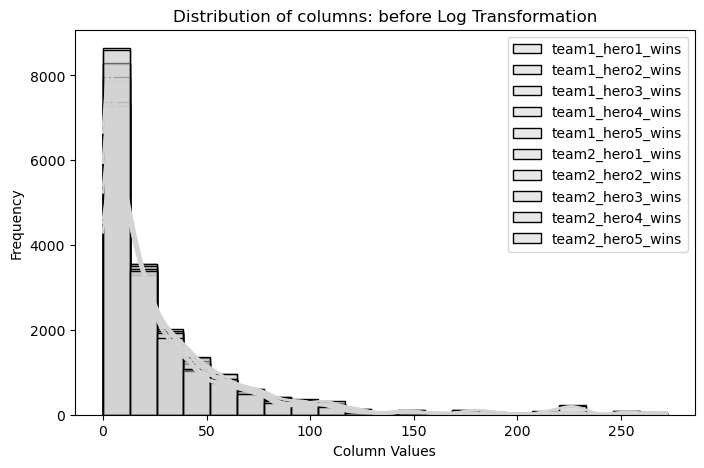

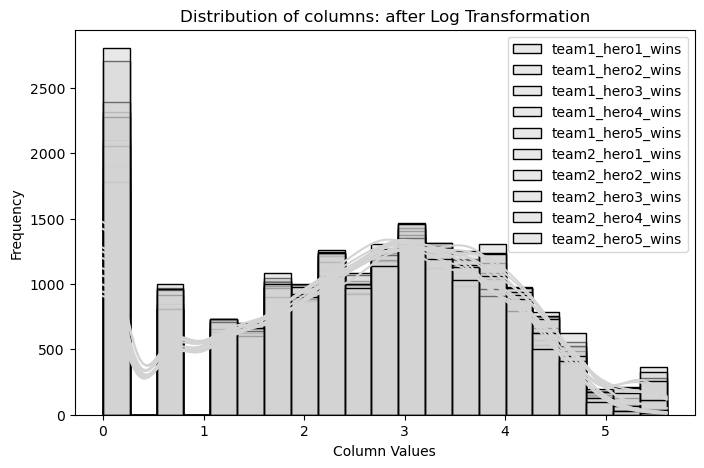

In [56]:
# apply log transformation on 6th chunk of columns
colors = ['lightgray' for _ in range(len(columns_chunk6))]
plot_columns_distribution_histplot(df, columns=columns_chunk6, colors=colors, xlabel="Column Values", title='before Log Transformation') # boxplots before treating outliers
df[columns_chunk6] = apply_log_transformation(df[columns_chunk6]) # treat outliers
plot_columns_distribution_histplot(df, columns=columns_chunk6, colors=colors, xlabel="Column Values", title='after Log Transformation') # boxplots after treating outliers

In [57]:
get_columns_with_outliers(df[columns_with_outliers])

# Columns with outliers: 9
'team1_rating'------------------> 1268 outliers (7.43 %)
'team1_wins'--------------------> 705 outliers (4.13 %)
'team1_losses'------------------> 552 outliers (3.23 %)
'team2_rating'------------------> 1224 outliers (7.17 %)
'team2_wins'--------------------> 784 outliers (4.59 %)
'team2_losses'------------------> 491 outliers (2.88 %)
'team1_player1_gamesPlayed'-----> 121 outliers (0.71 %)
'team1_player3_gamesPlayed'-----> 121 outliers (0.71 %)
'team2_player1_gamesPlayed'-----> 195 outliers (1.14 %)



['team1_rating',
 'team1_wins',
 'team1_losses',
 'team2_rating',
 'team2_wins',
 'team2_losses',
 'team1_player1_gamesPlayed',
 'team1_player3_gamesPlayed',
 'team2_player1_gamesPlayed']

Both techniques (__flooring & capping__ and __log transformation__ show impressive results.

One remarkable difference is that after log transformation we still have some outliers on 9 columns.

However, these are few compared to the previous amount of outliers (between 0.7% and 7%) and represent aprox. 7% of the entire dataset.

The __distributions are more similar to normal distributions after log transformation.__

On the other hand, flooring & capping presents 0 outliers on all columns, but their distributions are far from normal.

Let's stick to __log transformation__ as its __results__ because it presents features more __closer to normal distributions__.

### 3. Data Normalization
- categorical features
- datetime columns
- label encoding ordinal variables
- standard scaling

__Categorical features__

To identify nominal variables let's check the non-numeric columns previously identified.

In [58]:
non_numeric_columns

['start_time',
 'radiant_name',
 'dire_name',
 'league_name',
 'team1_last_match_time',
 'team2_last_match_time',
 'radiant_win']

In [59]:
df[non_numeric_columns]

start_time        radiant_name         dire_name  \
0     2024-04-10 16:30:52           Azure Ray                OG   
1     2024-04-10 16:27:41      Prodigy Of God       Ghost Sheep   
2     2024-04-10 16:30:01        BetBoom Team      BOOM Esports   
3     2024-04-10 16:11:45            Dominion      Elite Eclips   
4     2024-04-10 15:29:56      Prodigy Of God       Ghost Sheep   
...                   ...                 ...               ...   
17072 2023-08-18 06:16:56      Wiser Warriors  Bright Crusaders   
17073 2023-08-18 06:14:42    Team Disillusion        Holy Grail   
17074 2023-08-18 05:55:42             SHAOLIN    Lucky Bulldogs   
17075 2023-08-18 05:24:46    Bright Crusaders    Wiser Warriors   
17076 2023-08-18 05:12:38  Marvelous Warriors            Crew X   

                                    league_name team1_last_match_time  \
0               Elite League by FISSURE and ESB   2024-04-10 16:30:52   
1               Ultras Dota Pro League  2023-24   2024-04-10 16:27:41   
2               Elite League by FISSURE and ESB   2024-04-10 17:29:03   
3               Ultras Dota Pro League  2023-24   2024-04-10 16:11:45   
4               Ultras Dota Pro League  2023-24   2024-04-10 16:27:41   
...                                         ...                   ...   
17072                            Destiny league   2024-04-10 11:05:56   
17073  Road to TI 2023 - CN Regional Qualifiers   2023-11-04 06:54:46   
17074                           Ancients League   2024-04-09 05:27:26   
17075                            Destiny league   2024-04-10 06:33:44   
17076                           Ancients League   2024-04-10 06:37:45   

      team2_last_match_time radiant_win  
0       2024-04-10 16:30:52       False  
1       2024-04-10 16:27:41        True  
2       2024-04-10 17:29:03        True  
3       2024-04-10 16:11:45       False  
4       2024-04-10 16:27:41        True  
...                     ...         ...  
17072   2024-04-10 06:33:44       False  
17073   2023-11-11 06:35:49       False  
17074   2024-04-09 04:36:41        True  
17075   2024-04-10 11:05:56       False  
17076   2024-04-10 05:16:40        True  

[17077 rows x 7 columns]

These 3 columns are actually date types:
- __start_time__
- __team1_last_match_time__
- __team2_last_match_time__

These other 3 columns are just names for the already numeric ID columns (so we will remove them):
- __radiant_name__ ---> (team1_id)
- __dire_name__ ---> (team2_id)
- __league_name__ ---> (leagueid)

The last non-numeric column is our target:
- __radiant_win__

which has boolean values, so we can map its values to numerical.

__Datetime columns__

Let's __extract useful columns from the date features__.

For example, for 'start_time' we can extract:
- day
- month
- hour
- minute
- week
- weekday

For 'team1_last_match_time' and 'team2_last_match_time' we can extract:
- number of days passed since the team last played

__After extracting, we can remove the original datetime columns.__

In [60]:
# function to extract numerical features from the datetime columns
def extract_features_from_date_columns(df_original):
    df = df_original.copy()
    # extracting month, day, hour, minute, weekday, week of the year columns from a date column
    df['start_time_month'] = df['start_time'].dt.month
    df['start_time_day'] = df['start_time'].dt.day
    df['start_time_hour'] = df['start_time'].dt.hour
    df['start_time_minute'] = df['start_time'].dt.minute
    df['start_time_week'] = df['start_time'].dt.weekofyear
    df['start_time_weekday'] = df['start_time'].dt.weekday
    # counting the number of days elapsed since a date (from 2 original date columns)
    df['team1_days_last_match'] = (pd.datetime.today() - df['team1_last_match_time']).dt.days
    df['team2_days_last_match'] = (pd.datetime.today() - df['team2_last_match_time']).dt.days
    return df

df = extract_features_from_date_columns(df)

In [61]:
# display the new columns
new_columns = ['start_time_month',
               'start_time_day',
               'start_time_hour',
               'start_time_minute',
               'start_time_week',
               'start_time_weekday',
               'team1_days_last_match',
               'team2_days_last_match']
df[new_columns]

start_time_month  start_time_day  start_time_hour  start_time_minute  \
0                     4              10               16                 30   
1                     4              10               16                 27   
2                     4              10               16                 30   
3                     4              10               16                 11   
4                     4              10               15                 29   
...                 ...             ...              ...                ...   
17072                 8              18                6                 16   
17073                 8              18                6                 14   
17074                 8              18                5                 55   
17075                 8              18                5                 24   
17076                 8              18                5                 12   

       start_time_week  start_time_weekday  team1_days_last_match  \
0                   15                   2                      3   
1                   15                   2                      3   
2                   15                   2                      3   
3                   15                   2                      3   
4                   15                   2                      3   
...                ...                 ...                    ...   
17072               33                   4                      4   
17073               33                   4                    162   
17074               33                   4                      5   
17075               33                   4                      4   
17076               33                   4                      4   

       team2_days_last_match  
0                          3  
1                          3  
2                          3  
3                          3  
4                          3  
...                      ...  
17072                      4  
17073                    155  
17074                      5  
17075                      4  
17076                      4  

[17077 rows x 8 columns]

Let's not forget the log transformation for these columns as well.

In [62]:
# apply log transformation on the new features
df[new_columns] = apply_log_transformation(df[new_columns]) # treat outliers
df[new_columns]

start_time_month  start_time_day  start_time_hour  start_time_minute  \
0              1.386294        2.302585         2.772589           3.401197   
1              1.386294        2.302585         2.772589           3.295837   
2              1.386294        2.302585         2.772589           3.401197   
3              1.386294        2.302585         2.772589           2.397895   
4              1.386294        2.302585         2.708050           3.367296   
...                 ...             ...              ...                ...   
17072          2.079442        2.890372         1.791759           2.772589   
17073          2.079442        2.890372         1.791759           2.639057   
17074          2.079442        2.890372         1.609438           4.007333   
17075          2.079442        2.890372         1.609438           3.178054   
17076          2.079442        2.890372         1.609438           2.484907   

       start_time_week  start_time_weekday  team1_days_last_match  \
0             2.708050            0.693147               1.098612   
1             2.708050            0.693147               1.098612   
2             2.708050            0.693147               1.098612   
3             2.708050            0.693147               1.098612   
4             2.708050            0.693147               1.098612   
...                ...                 ...                    ...   
17072         3.496508            1.386294               1.386294   
17073         3.496508            1.386294               5.087596   
17074         3.496508            1.386294               1.609438   
17075         3.496508            1.386294               1.386294   
17076         3.496508            1.386294               1.386294   

       team2_days_last_match  
0                   1.098612  
1                   1.098612  
2                   1.098612  
3                   1.098612  
4                   1.098612  
...                      ...  
17072               1.386294  
17073               5.043425  
17074               1.609438  
17075               1.386294  
17076               1.386294  

[17077 rows x 8 columns]

__Label encoding ordinal variables__

As the only categorical variable that we have is our __target ('radiant_win')__ we can map the following values:
- True  ---> 1
- False ---> 0

In [63]:
# map target values into numerical
df.replace({False: 0, True: 1}, inplace=True)
df[['radiant_win']].tail()

radiant_win
17072            0
17073            0
17074            1
17075            0
17076            1

Let's remove the non-numerical columns that we already processed.

In [64]:
# drop to following columns from the dataset
columns_drop = ['start_time', 'team1_last_match_time', 'team2_last_match_time', 'radiant_name', 'dire_name', 'league_name']
display_shape_and_colnames(df, colnames=False) # columns before
df.drop(columns_drop, axis=1, inplace=True) # drop columns
display_shape_and_colnames(df, colnames=False) # columns after

# Rows: 17077
# Columns: 103
# Rows: 17077
# Columns: 97


__Standard scaling__

Now that we have only numerical columns, let's apply a Scaler to our dataset.

We will firstly go for a Standard Scaling.

In [65]:
from sklearn.preprocessing import StandardScaler

# function to scale an entire dataset, returns only numeric columns scaled
def standard_scale_dataset(df, target):
    # get numerical columns and exclude target
    numerical_columns = get_numerical_columns(df)
    if target in numerical_columns:
        numerical_columns.remove(target)
    
    # scale the dataset using a StandardScaler
    scaler = StandardScaler()
    df_numeric = df[numerical_columns]
    df_scaled = scaler.fit_transform(df_numeric.to_numpy())
    df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns.to_list())
    df_scaled[target] = df[target]
    return df_scaled

# apply standard scaling to the entire dataset
df_scaled = standard_scale_dataset(df, 'radiant_win')
df_scaled

match_id  radiant_team_id  dire_team_id  leagueid  series_type  \
0      1.691985         0.034988     -3.528572  1.572843     4.922112   
1      1.691978         0.412694      0.188432  0.345436    -0.077734   
2      1.691923        -0.154468     -0.465229  1.572843     4.922112   
3      1.691810         0.492784      0.525350  0.345436    -0.077734   
4      1.691258         0.412694      0.188432  0.345436    -0.077734   
...         ...              ...           ...       ...          ...   
17072 -1.685209         0.067540      0.068349 -1.499894    -0.077734   
17073 -1.685247         0.039456      0.300150 -0.101661    -0.077734   
17074 -1.685355         0.265215      0.225807 -0.542431    -0.077734   
17075 -1.685582         0.067541      0.068348 -1.499894    -0.077734   
17076 -1.685661         0.207169      0.300041 -0.542431    -0.077734   

         region  team2_ban1  team1_ban1  team1_ban2  team2_ban2  ...  \
0     -0.402111   -1.522354   -0.270104    0.403942   -0.642344  ...   
1      0.449940    1.843585    0.178452   -1.460780    0.546860  ...   
2     -0.402111    0.692079    0.148549   -1.404274   -0.160999  ...   
3      0.449940    0.455873    1.464314    0.403942   -1.236945  ...   
4      0.449940    0.308244    0.178452    0.093155    0.546860  ...   
...         ...         ...         ...         ...         ...  ...   
17072 -0.402111   -1.847138   -0.987794   -1.743314    0.660118  ...   
17073  1.983631    1.843585    0.507394   -1.630301   -0.472457  ...   
17074 -0.402111    0.337770   -0.000970    1.082023    0.376974  ...   
17075 -0.402111   -0.990890    1.135372    1.053769   -0.783915  ...   
17076 -0.402111   -0.400375    0.327971   -0.923966   -1.916490  ...   

       team2_hero5_wins  start_time_month  start_time_day  start_time_hour  \
0              0.680352         -0.243206       -0.283663         0.749807   
1              0.624159         -0.243206       -0.283663         0.749807   
2              0.460152         -0.243206       -0.283663         0.749807   
3             -0.835695         -0.243206       -0.283663         0.749807   
4              0.496162         -0.243206       -0.283663         0.659928   
...                 ...               ...             ...              ...   
17072          0.826124          0.544579        0.437327        -0.616131   
17073         -0.633731          0.544579        0.437327        -0.616131   
17074          0.732379          0.544579        0.437327        -0.870038   
17075          2.094898          0.544579        0.437327        -0.870038   
17076          0.826124          0.544579        0.437327        -0.870038   

       start_time_minute  start_time_week  start_time_weekday  \
0               0.512822        -0.201363           -0.319570   
1               0.422154        -0.201363           -0.319570   
2               0.512822        -0.201363           -0.319570   
3              -0.350565        -0.201363           -0.319570   
4               0.483648        -0.201363           -0.319570   
...                  ...              ...                 ...   
17072          -0.028125         0.547141            0.692598   
17073          -0.143034         0.547141            0.692598   
17074           1.034430         0.547141            0.692598   
17075           0.320797         0.547141            0.692598   
17076          -0.275688         0.547141            0.692598   

       team1_days_last_match  team2_days_last_match  radiant_win  
0                  -1.037292              -1.037363            0  
1                  -1.037292              -1.037363            1  
2                  -1.037292              -1.037363            1  
3                  -1.037292              -1.037363            0  
4                  -1.037292              -1.037363            1  
...                      ...                    ...          ...  
17072              -0.847854              -0.847808            0  
17073      

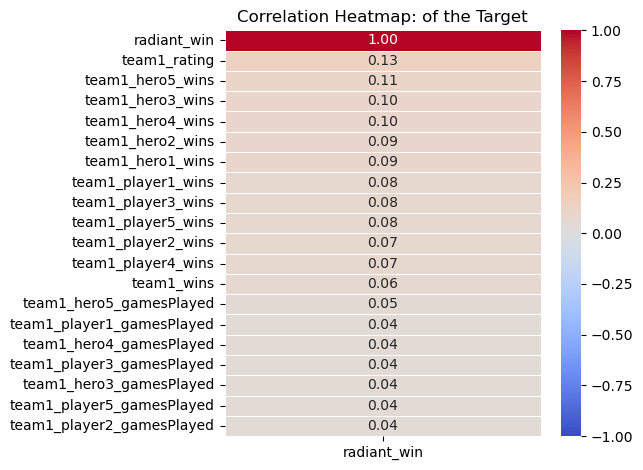

In [66]:
# heatmap of top 20 positive correlations between features and target
correlation_matrix = get_target_top_correlated_features(df_scaled, 'radiant_win', top_n=20, map_target=False)
plot_heatmap(correlation_matrix)

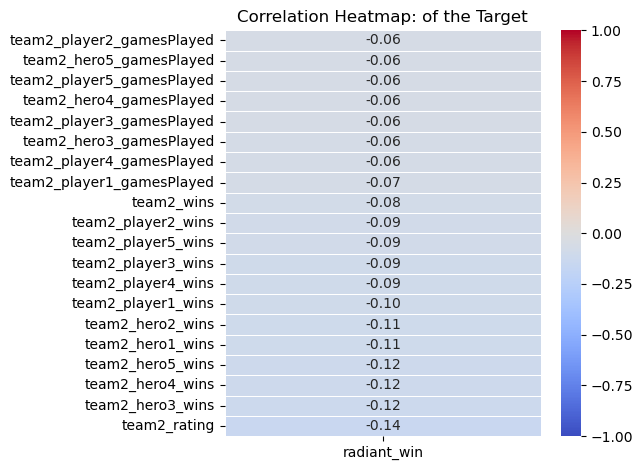

In [67]:
# heatmap of top 20 negative correlations between features and target
correlation_matrix = get_target_top_correlated_features(df_scaled, 'radiant_win', top_n=-20, map_target=False)
plot_heatmap(correlation_matrix)

The correlation between our features and target have improved a bit after the pre-processing and scaling.

### 4. Dimensionality Reduction techniques (feature selection, feature extraction)
- __feature selection (remove uncorrelated columns)__
- __PCA__
- __Kernel PCA__
- __LDA__

__Feature selection (remove uncorrelated columns)__

First of all, we have already discarded the following columns during the dataset scaling.

These are the reasons why we discarded them:
- __'start_time'__ ---> because the column is in date format and we already extracted 6 new features from it.
- __'team1_last_match_time'__ ---> because the column is in date format and we already extracted 1 feature from it
- __'team2_last_match_time'__ ---> because the column is in date format and we already extracted 1 feature from it
- __'radiant_name'__ ---> because the column is just a label for this other feature 'team1_id'
- __'dire_name'__ ---> because the column is just a label for this other feature 'team2_id'
- __'league_name'__ ---> because the column is just a label for this other feature 'leagueid'

Now let's discard more columns that are correlated between themselves, this is to stabilize the model.

Let's discard these 2 columns because they are __100% correlated__ with other columns:
- __radiant_team_id__ ---> team1_id
- __dire_team_id__ ---> team2_id

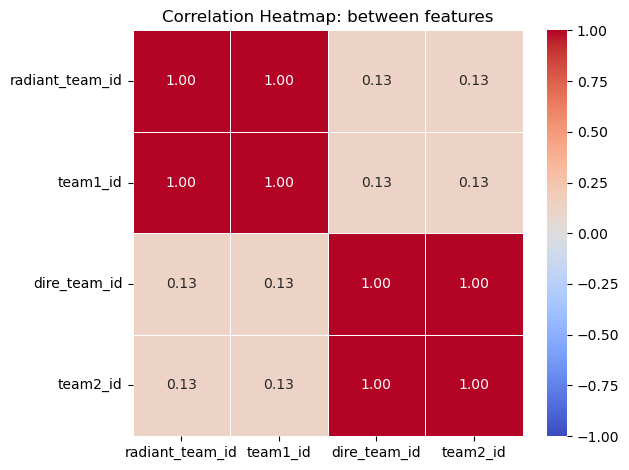

In [68]:
# plot correlation between some features
plot_heatmap(df_scaled[['radiant_team_id', 'team1_id', 'dire_team_id', 'team2_id']].corr(), title="between features")

In [69]:
# drop correlated features
repeated_columns = ['radiant_team_id', 'dire_team_id']
display_shape_and_colnames(df_scaled, colnames=False) # check shape before dropping
df_scaled.drop(repeated_columns, axis=1, inplace=True) # drop columns
display_shape_and_colnames(df_scaled, colnames=False) # check shape after dropping

# Rows: 17077
# Columns: 97
# Rows: 17077
# Columns: 95


Now let's __identify the most uncorrelated features to our target__.

In [70]:
# function to identify features with less than thresh % of correaltion to a target column
def get_target_uncorrelated_features(df, target, thresh=0.1):
    df_corr = df.copy()
    correlation_matrix = df_corr.corr() # get dataframe correaltion matrix
    correlation_target = correlation_matrix[[target]].sort_values(by=target, ascending=False) # sort the target correlations in descending order
    correlation_filter_1 = correlation_target[target] >= -thresh
    correlation_filter_2 = correlation_target[target] <= thresh
    return correlation_target[correlation_filter_1 & correlation_filter_2] # filter only features with lower correaltion than thresh (+ or -)

correlation_matrix = get_target_uncorrelated_features(df_scaled, 'radiant_win')
correlation_matrix

radiant_win
team1_hero4_wins       0.099739
team1_hero2_wins       0.092585
team1_hero1_wins       0.086688
team1_player1_wins     0.077538
team1_player3_wins     0.076974
...                         ...
team2_player2_wins    -0.090931
team2_player5_wins    -0.092157
team2_player3_wins    -0.093768
team2_player4_wins    -0.094959
team2_player1_wins    -0.098374

[85 rows x 1 columns]

In [71]:
# display column names of least correlated features (<10%) to our target
display_shape_and_colnames(correlation_matrix.T, colnames=True)

# Rows: 1
# Columns: 85
Column names: Index(['team1_hero4_wins', 'team1_hero2_wins', 'team1_hero1_wins',
       'team1_player1_wins', 'team1_player3_wins', 'team1_player5_wins',
       'team1_player2_wins', 'team1_player4_wins', 'team1_wins',
       'team1_hero5_gamesPlayed', 'team1_player1_gamesPlayed',
       'team1_hero4_gamesPlayed', 'team1_player3_gamesPlayed',
       'team1_hero3_gamesPlayed', 'team1_player5_gamesPlayed',
       'team1_player2_gamesPlayed', 'team1_player4_gamesPlayed',
       'team1_hero2_gamesPlayed', 'team2_days_last_match',
       'team1_hero1_gamesPlayed', 'start_time_week', 'start_time_month',
       'team1_hero1', 'team2_hero2', 'team2_id', 'team1_ban5', 'team2_ban4',
       'team2_ban5', 'team2_ban6', 'start_time_weekday', 'team2_hero1',
       'start_time_hour', 'team1_losses', 'team1_ban2', 'team2_ban1',
       'leagueid', 'start_time_day', 'team2_ban2', 'team2_hero3', 'region',
       'team2_player1_id', 'team1_ban3', 'team2_hero5', 'team1_ban1',
      

From the __94 features, 85 have <= 10% of correlation to our target__.

Let's __get rid of these columns because their correlation is below a minimum threshold of 10%.__

In [72]:
uncorrelated_columns = correlation_matrix.index.to_list() # save uncorrelated (to target) columns
df = df_scaled.copy() # save a copy of the entire scaled dataset before dropping
df_scaled = df_scaled.drop(uncorrelated_columns, axis=1) # drop columns
display_shape_and_colnames(df_scaled, colnames=True) # show remaining columns

# Rows: 17077
# Columns: 10
Column names: Index(['team1_rating', 'team2_rating', 'team1_hero3_wins', 'team1_hero5_wins',
       'team2_hero1_wins', 'team2_hero2_wins', 'team2_hero3_wins',
       'team2_hero4_wins', 'team2_hero5_wins', 'radiant_win'],
      dtype='object')


We are left with the __top 9 most important features.__

Let's visualize the correaltion bewteen the remaining features (including our target 'radiant_win')

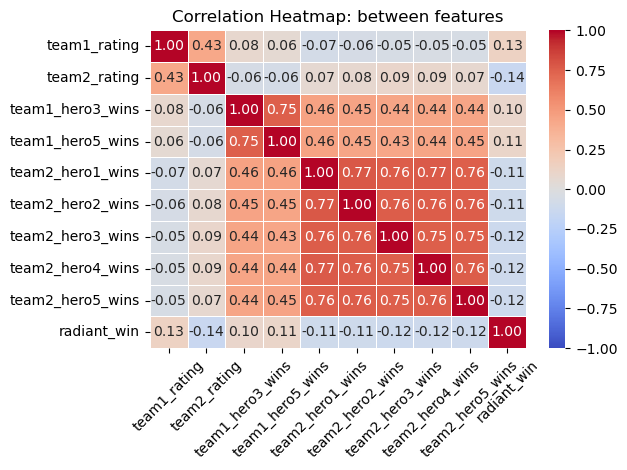

In [73]:
# plot the correlation between our remaining features (including target)
plot_heatmap(df_scaled.corr(), xticks=45, title="between features")

__PCA__

As we still see low correlation between our remaining features and our target.

Let's try a PCA technique for dimensionality reduction (using our scaled dataframe before most columns were dropped).

Let's try:
- Number of components with > 0.99 variance
- Only top 5 components from PCA

In [74]:
from sklearn.decomposition import PCA

# function to extract PCA features from a dataset
def get_pca_features(df, target, n_components, print_=True):
    # get features applying PCA technique
    pca = PCA(n_components = n_components, whiten = True)
    features = df.drop(target, axis=1).to_numpy()
    features_pca = pca.fit_transform(features)
    
    # print nubmer of features before and after
    if print_:
        print('Original number of features:', features.shape[1])
        print('Reduced number of features:', features_pca.shape[1])
        print('PCA Explained Variance Ratio:', pca.explained_variance_ratio_)
        
    return features_pca

# function to convert numpy features and target into an actual pandas dataframe
def get_dataframe(features, target_name, target):
    df = pd.DataFrame(features)
    df[target_name] = target
    return df

target = 'radiant_win'
# get only the components with >99% variance from PCA
pca_features = get_pca_features(df, target, n_components=0.99)
pca_df = get_dataframe(pca_features, target, df[target])
pca_df

Original number of features: 94
Reduced number of features: 68
PCA Explained Variance Ratio: [0.32510702 0.06147076 0.05899441 0.03776082 0.01935902 0.01591447
 0.01227795 0.01195243 0.01160918 0.01149336 0.01136085 0.01129855
 0.0111516  0.01096709 0.01095658 0.01088412 0.01077307 0.01072634
 0.01071017 0.01061085 0.01057983 0.01046218 0.01044122 0.01038422
 0.01031995 0.01030479 0.01013632 0.0101049  0.01005685 0.01004949
 0.00990177 0.00973323 0.00969654 0.00951316 0.00938103 0.00860587
 0.00812437 0.00700065 0.00679563 0.00645795 0.00630294 0.00580453
 0.00542905 0.00533052 0.00530833 0.00515639 0.00511711 0.0050918
 0.00490617 0.0047736  0.00474442 0.00471056 0.00466185 0.0045734
 0.00455456 0.00450397 0.00448351 0.00439289 0.00430436 0.00415149
 0.00389294 0.00381496 0.00366858 0.00362073 0.00349761 0.00346066
 0.00340894 0.00328426]


0         1         2         3         4         5         6  \
0     -0.326227 -1.898653 -1.036026 -1.724480  1.259502  3.019304 -1.477696   
1     -0.163517  1.098991 -1.498541 -0.919971  1.492257 -0.343179  1.214946   
2     -0.105513 -1.383438 -0.308149 -1.696992  0.388263  3.001570 -1.520104   
3      1.119347  2.016298  1.118296 -1.323347  0.012199  0.242446  0.886614   
4     -0.244465  1.005248 -1.178373 -0.934067  1.950144 -0.447031  1.225106   
...         ...       ...       ...       ...       ...       ...       ...   
17072 -1.471403  0.177114  0.502843  0.854002 -0.307557 -0.620637 -1.108730   
17073  0.761899 -0.461924 -0.821141  1.088347 -0.513308  0.063032  1.141025   
17074 -0.897982  1.686398  0.280542  0.480830 -0.402616  1.489960 -0.411107   
17075 -1.502789  0.247145 -0.509761  0.956117 -0.091355 -0.158740 -0.767004   
17076 -1.087137  1.666619  0.199175  0.700081 -0.184465  0.360958  0.528179   

              7         8         9  ...        59        60        61  \
0      0.771825 -0.049652 -0.432359  ... -0.350109  0.615829 -0.651343   
1      0.527902 -0.787609 -0.855885  ... -0.447812  1.017958 -2.722983   
2      1.089160  0.486403  0.292732  ...  0.333211 -1.438058 -0.484086   
3     -0.583200  1.096533  0.570968  ...  1.205102  0.584717  0.358589   
4      0.140721  0.515026 -0.418432  ...  1.180483  1.613506 -2.921123   
...         ...       ...       ...  ...       ...       ...       ...   
17072 -1.598696 -0.400296 -0.130464  ...  0.652482  0.448105 -0.336092   
17073  1.464400  1.240254 -0.539558  ...  0.504896 -1.462474 -0.745718   
17074 -0.689408 -1.232198  0.185610  ... -0.359370  0.149732 -0.099808   
17075 -1.023699  1.263686  1.570647  ...  0.001171 -1.072711  1.088751   
17076  1.234834 -0.235538  1.027433  ... -0.006776  0.185651 -0.252678   

             62        63        64        65        66        67  radiant_win  
0      0.048580 -1.198510 -0.238711  0.237922  0.860642  1.046124            0  
1      1.235923 -0.082773  0.525039  1.089440  1.073574  0.384174            1  
2     -0.589342  0.254727  0.541839  0.409189  0.031241 -0.577940            1  
3     -0.259385 -0.419255  1.164689 -0.901611 -0.933353  0.481228            0  
4      1.268588 -0.302562  0.882366  1.006255  1.783862  0.119177            1  
...         ...       ...       ...       ...       ...       ...          ...  
17072 -0.981309 -0.270185  0.894382  0.369097  0.565135 -0.040091            0  
17073  0.261578 -0.166059  0.752153 -1.306151 -0.518329  0.257622            0  
17074  0.080616 -0.135003  0.107042  0.125031 -0.352026  0.212346            1  
17075 -0.377884 -0.618717 -0.250042  0.025604 -0.848347 -0.143984            0  
17076  0.537333 -0.180754 -0.504887 -0.082122 -0.316955  0.213473            1  

[17077 rows x 69 columns]

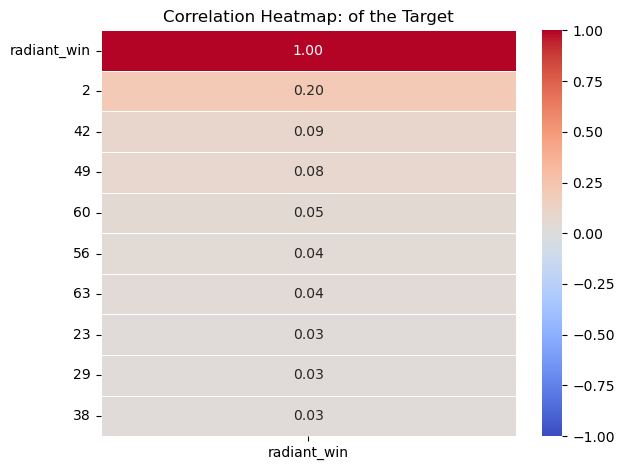

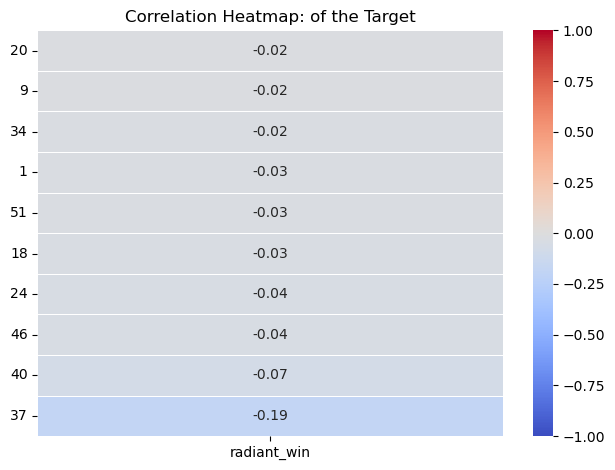

In [75]:
# heatmap of the >99% variance components
correlation_matrix = get_target_top_correlated_features(pca_df, 'radiant_win', top_n=10, map_target=False)
plot_heatmap(correlation_matrix)
correlation_matrix = get_target_top_correlated_features(pca_df, 'radiant_win', top_n=-10, map_target=False)
plot_heatmap(correlation_matrix)

In [76]:
# get only the top 5 components from PCA
pca_features = get_pca_features(df, target, n_components=5)
pca_df = get_dataframe(pca_features, target, df[target])
pca_df

Original number of features: 94
Reduced number of features: 5
PCA Explained Variance Ratio: [0.32510702 0.06147076 0.05899441 0.03776082 0.01935676]


0         1         2         3         4  radiant_win
0     -0.326227 -1.898657 -1.036025 -1.724456  1.259317            0
1     -0.163517  1.098991 -1.498548 -0.920116  1.511153            1
2     -0.105513 -1.383437 -0.308148 -1.697057  0.414530            1
3      1.119347  2.016296  1.118294 -1.323500  0.016264            0
4     -0.244465  1.005246 -1.178374 -0.934192  1.941369            1
...         ...       ...       ...       ...       ...          ...
17072 -1.471403  0.177110  0.502845  0.854033 -0.312792            0
17073  0.761899 -0.461922 -0.821147  1.088228 -0.490403            0
17074 -0.897982  1.686393  0.280536  0.480832 -0.424901            1
17075 -1.502789  0.247144 -0.509761  0.956068 -0.099047            0
17076 -1.087137  1.666620  0.199173  0.700144 -0.191037            1

[17077 rows x 6 columns]

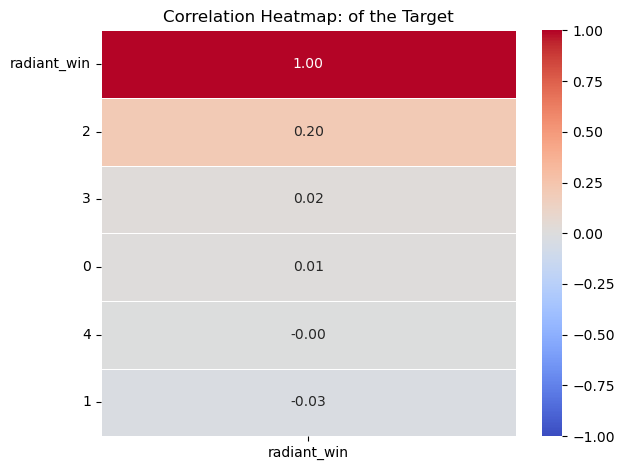

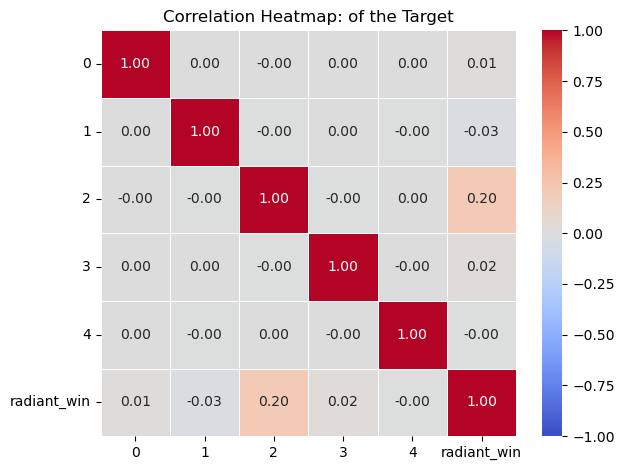

In [77]:
# heatmap of the top 5 components (features)
correlation_matrix = get_target_top_correlated_features(pca_df, 'radiant_win', top_n=6, map_target=False)
plot_heatmap(correlation_matrix)
plot_heatmap(pca_df.corr())

We have some more correlated PCA features with __>20% and -19% of correlation__.

However, the other features have significantly reduced their correlation to the target.

__Kernel PCA__

Let's also try Kernel PCA to check if we have better results, assuming that our data is not linearly separable.

We will test with:
- top 12 KPCA components
- top 6 KPCA components

In [78]:
from sklearn.decomposition import KernelPCA

# function to extract Kernel PCA features from a dataset
def get_kpca_features(df, target, n_components, gamma=15, print_=True):
    # get features applying KPCA technique
    kpca = KernelPCA(kernel="rbf", gamma=gamma, n_components=n_components)
    features = df.drop(target, axis=1).to_numpy()
    features_kpca = kpca.fit_transform(features)
    
    # print nubmer of features before and after
    if print_:
        print('Original number of features:', features.shape[1])
        print('Reduced number of features:', features_kpca.shape[1])
        
    return features_kpca

# get top 12 KPCA features
kpca_features = get_kpca_features(df, target, n_components=12)
kpca_df = get_dataframe(kpca_features, target, df[target])
kpca_df

Original number of features: 94
Reduced number of features: 12


0         1         2             3         4         5  \
0     -0.000330  0.000211 -0.000000 -3.083066e-07 -0.000000 -0.000000   
1      0.627115 -0.113549  0.000146  3.008111e-04  0.000128 -0.000021   
2     -0.511034 -0.001229 -0.000068 -6.329137e-04  0.000014  0.000078   
3      0.045508  0.454832  0.000085 -2.169466e-03  0.000413  0.000231   
4     -0.002684 -0.365210  0.000703  3.830649e-03  0.000491 -0.000352   
...         ...       ...       ...           ...       ...       ...   
17072 -0.001344  0.000810  0.000590  5.852172e-04 -0.000355 -0.002706   
17073 -0.001355  0.000607 -0.001242  7.035331e-04 -0.000316  0.003491   
17074 -0.001215  0.001765 -0.000586 -9.257448e-05  0.001425 -0.001188   
17075 -0.000893 -0.001269  0.001982 -4.094271e-04  0.001074 -0.005570   
17076 -0.002342 -0.001746 -0.000817 -1.111900e-03  0.000483 -0.000295   

              6         7         8         9        10        11  radiant_win  
0     -0.000000  0.000000 -0.000000  0.000000 -0.000000  0.000000            0  
1     -0.000204 -0.000067 -0.000008 -0.000103 -0.000066 -0.000151            1  
2      0.000320  0.000208 -0.000008 -0.000026 -0.000257  0.000248            1  
3      0.000207  0.000178  0.000445 -0.000185  0.000686  0.000398            0  
4     -0.000966 -0.001066 -0.000610 -0.000414  0.000498 -0.000216            1  
...         ...       ...       ...       ...       ...       ...          ...  
17072  0.000539  0.000204  0.000142  0.000161  0.002081 -0.000158            0  
17073  0.000554  0.000417 -0.000949 -0.000600 -0.001414  0.001787            0  
17074  0.000010  0.000916  0.000115 -0.000807 -0.000412 -0.000518            1  
17075 -0.001368  0.000546 -0.000410  0.000527 -0.000416 -0.000636            0  
17076  0.000497  0.000867 -0.000337 -0.000412  0.000925 -0.001892            1  

[17077 rows x 13 columns]

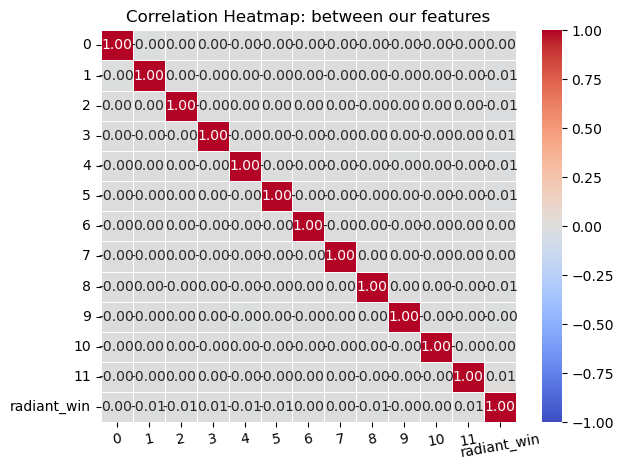

In [79]:
# plot correlation between our KPCA features (including target)
plot_heatmap(kpca_df.corr(), title='between our features', xticks=10)

In [80]:
# get top 5 KPCA features
kpca_features = get_kpca_features(df, target, n_components=5)
kpca_df = get_dataframe(kpca_features, target, df_scaled[target])
kpca_df

Original number of features: 94
Reduced number of features: 5


0         1         2         3         4  radiant_win
0     -0.000364 -0.000774 -0.002000  0.001485  0.003947            0
1      0.002827 -0.001436  0.000054  0.001077 -0.000265            1
2     -0.010832  0.002587  0.028515  0.004377 -0.023517            1
3     -0.002293  0.006451 -0.011792 -0.004255 -0.003205            0
4      0.000608 -0.001844 -0.002810 -0.001459 -0.000190            1
...         ...       ...       ...       ...       ...          ...
17072 -0.000056  0.000278  0.000221 -0.000267 -0.000030            0
17073 -0.000488 -0.000369 -0.001573  0.000539 -0.000222            0
17074 -0.000280 -0.000029  0.001125  0.000081  0.000283            1
17075 -0.000768 -0.000444  0.000996  0.000481 -0.000460            0
17076 -0.000127  0.000263  0.001430 -0.000257 -0.000291            1

[17077 rows x 6 columns]

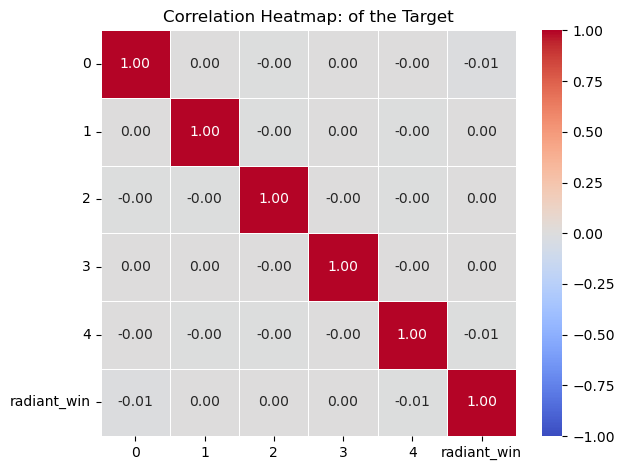

In [81]:
# plot correlation between our KPCA features (including target)
plot_heatmap(kpca_df.corr())

It seems that our __data is linearly separable as our results with Kernel PCA has worsen our features.__

__LDA: Linear Discriminant Analysis__

Let's also try an LDA technique to reduce the dimensions maximizing the difference between classes (2 classes: true - false).

Given that we have 2 classes, we can only try generating 1 component.

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# function to extract lda features from a dataset
def get_lda_features(df, target, n_components, print_=True):
    # get features applying LDA technique
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    features = df.drop(target, axis=1).to_numpy()
    features_lda = lda.fit(features, df[target].to_numpy()).transform(features)
    
    # print nubmer of features before and after
    if print_:
        print('Original number of features:', features.shape[1])
        print('Reduced number of features:', features_lda.shape[1])
        print('LDA Explained Variance Ratio:', lda.explained_variance_ratio_)
        
    return features_lda, lda

# extracting LDA features
lda_features, lda_model = get_lda_features(df, target, n_components=1)
lda_df = get_dataframe(lda_features, target, df_scaled[target])
lda_df

Original number of features: 94
Reduced number of features: 1
LDA Explained Variance Ratio: [1.]


0  radiant_win
0     -0.460317            0
1     -1.203093            1
2     -0.262301            1
3     -2.667428            0
4     -1.230347            1
...         ...          ...
17072 -0.037664            0
17073 -1.203478            0
17074 -0.764187            1
17075 -0.212464            0
17076 -0.106421            1

[17077 rows x 2 columns]

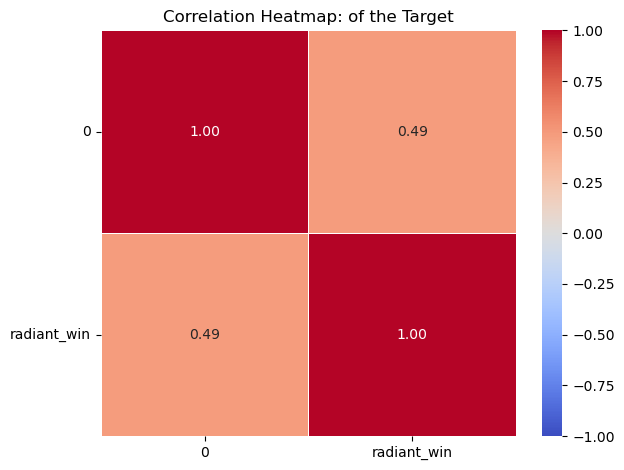

In [83]:
# plot correlation between our LDA features (including target)
plot_heatmap(lda_df.corr())

Our result for LDA is a __unique feature__ with the best correlation to our target that we have seen so far (__49%__).

And the Kernel PCA show the worst results, indicating that our dataset is linearly separable and doesn't need Kernel PCA technique.

Let's __discard the Kernel PCA dataset__ and stay with scaled, PCA, and LDA datasets.

### 5. Machine learning classification models
- __Split data test & train__
- __Train models & display metric__
- __Hyperparameter tuning__
- __compare models (visualization)__
- __interaction & polynomial features__

__Split data into test & train subsets__

Let's create a function to split our datasets.

In [84]:
from sklearn.model_selection import train_test_split

# function to split a dataset into test and train subsets
def split_dataset(df, target, test_size=0.3, print_=True):
    # set x features and y target
    x = df.drop([target], axis=1)
    y = df[target]
    
    # split the dataset into x & y - test & train subsets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    if print_:
        print('x_train shape:', x_train.shape)
        print('x_test shape:', x_test.shape)
        print('y_train shape:', y_train.shape)
        print('y_test shape:', y_test.shape) 
    return x_train, x_test, y_train, y_test

# split our scaled dataset
x_train, x_test, y_train, y_test = split_dataset(df_scaled, 'radiant_win')

x_train shape: (13661, 9)
x_test shape: (3416, 9)
y_train shape: (13661,)
y_test shape: (3416,)


__Train models & display metrics__

For this project __we don't have to use an over sampler (data augmentation) because our classes are balanced__.

Let's create functions to train a model and display its classification metrics.

In [85]:
from sklearn.metrics import accuracy_score, f1_score

# function to train a model
def train_model(model, x_train, y_train):
    model_fitted = model.fit(x_train, y_train)
    display(model_fitted)
    y_pred_train = model_fitted.predict(x_train)
    y_pred_test = model_fitted.predict(x_test)
    return y_pred_train, y_pred_test

# function to display the classification model metrics
def display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test, test_only=False):
    if not test_only:
        print('- Acuracy Score Train:', accuracy_score(y_train, y_pred_train).round(4))
    print('- Acuracy Score Test:', accuracy_score(y_test, y_pred_test).round(4))
    if not test_only:
        print('- F1 Score Train:', f1_score(y_train, y_pred_train).round(4))
    print('- F1 Score Test:', f1_score(y_test, y_pred_test).round(4))
    print()


Let's test a Logistic Regression model with our defined functions.

In [86]:
from sklearn.linear_model import LogisticRegression

# testing our 'train_model' and 'display_classifier_metrics' functions
y_pred_train, y_pred_test = train_model(LogisticRegression(), x_train, y_train)
display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test)

LogisticRegression()

- Acuracy Score Train: 0.6221
- Acuracy Score Test: 0.6314
- F1 Score Train: 0.6465
- F1 Score Test: 0.6561



__We have chosen the following ML classification models for this project__:
- LogisticRegression
- Random Forest
- Gradient Boosting
- Support Vector Machine

__Because these are strong classification algorithms that work best for binary classification.__

We will also compare results between all of them.

Let's train & test these 4 models with each of our datasets:
- Scaled Dataset
- PCA Dataset
- LDA Dataset

Initially we'll use __accuracy score__ and __F1-score__ to compare them. Then we will plot confusion matrixes and ROC Curves.

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# function to train & test a group of models, displaying each metrics for comparison
def train_and_measure_models(models, x_train, x_test, y_train, y_test, display_metrics=True):
    # loop through the models, train & test and display metrics, save the predictions
    y_predictions = {}
    for model in models:
        name = type(model).__name__ # extract the model name
        y_pred_train, y_pred_test = train_model(model, x_train, y_train) # train & test the model
        y_predictions[name] = (y_pred_train, y_pred_test) # save the predictions into a dictionary
        if display_metrics: # print model's name, accuracy and f1-score
            print("Model:", name)
            display_classifier_metrics(y_train, y_pred_train, y_test, y_pred_test)
    return y_predictions

# set the models that we will be testing on this project
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC()]

Let's start by train & Test our models using our numeric __Scaled Dataset__

In [88]:
display_shape_and_colnames(df_scaled)

# Rows: 17077
# Columns: 10
Column names: Index(['team1_rating', 'team2_rating', 'team1_hero3_wins', 'team1_hero5_wins',
       'team2_hero1_wins', 'team2_hero2_wins', 'team2_hero3_wins',
       'team2_hero4_wins', 'team2_hero5_wins', 'radiant_win'],
      dtype='object')


In [89]:
# test models using our scaled dataset
x_train, x_test, y_train, y_test = split_dataset(df_scaled, 'radiant_win')
y_predictions_scaled = train_and_measure_models(models.copy(), x_train, x_test, y_train, y_test)

x_train shape: (13661, 9)
x_test shape: (3416, 9)
y_train shape: (13661,)
y_test shape: (3416,)


LogisticRegression()

Model: LogisticRegression
- Acuracy Score Train: 0.6273
- Acuracy Score Test: 0.6253
- F1 Score Train: 0.6512
- F1 Score Test: 0.651



RandomForestClassifier()

Model: RandomForestClassifier
- Acuracy Score Train: 0.9996
- Acuracy Score Test: 0.6388
- F1 Score Train: 0.9996
- F1 Score Test: 0.6547



GradientBoostingClassifier()

Model: GradientBoostingClassifier
- Acuracy Score Train: 0.6741
- Acuracy Score Test: 0.6499
- F1 Score Train: 0.6912
- F1 Score Test: 0.6676



SVC()

Model: SVC
- Acuracy Score Train: 0.6611
- Acuracy Score Test: 0.6423
- F1 Score Train: 0.6902
- F1 Score Test: 0.6745



Train & Test our models using our __PCA Dataset__

In [90]:
display_shape_and_colnames(pca_df)

# Rows: 17077
# Columns: 6
Column names: Index([0, 1, 2, 3, 4, 'radiant_win'], dtype='object')


In [91]:
# test models using our pca dataset
x_train, x_test, y_train, y_test = split_dataset(pca_df, 'radiant_win')
y_predictions_pca = train_and_measure_models(models.copy(), x_train, x_test, y_train, y_test)

x_train shape: (13661, 5)
x_test shape: (3416, 5)
y_train shape: (13661,)
y_test shape: (3416,)


LogisticRegression()

Model: LogisticRegression
- Acuracy Score Train: 0.5805
- Acuracy Score Test: 0.5902
- F1 Score Train: 0.6215
- F1 Score Test: 0.63



RandomForestClassifier()

Model: RandomForestClassifier
- Acuracy Score Train: 1.0
- Acuracy Score Test: 0.5711
- F1 Score Train: 1.0
- F1 Score Test: 0.587



GradientBoostingClassifier()

Model: GradientBoostingClassifier
- Acuracy Score Train: 0.6205
- Acuracy Score Test: 0.5943
- F1 Score Train: 0.6512
- F1 Score Test: 0.6244



SVC()

Model: SVC
- Acuracy Score Train: 0.5945
- Acuracy Score Test: 0.584
- F1 Score Train: 0.6365
- F1 Score Test: 0.6248



Train & Test our models using our __Kernel PCA Dataset__

In [92]:
display_shape_and_colnames(kpca_df)

# Rows: 17077
# Columns: 6
Column names: Index([0, 1, 2, 3, 4, 'radiant_win'], dtype='object')


In [93]:
# test models using our Kernel PCA dataset
x_train, x_test, y_train, y_test = split_dataset(kpca_df, 'radiant_win')
y_predictions_kpca = train_and_measure_models(models.copy(), x_train, x_test, y_train, y_test)

x_train shape: (13661, 5)
x_test shape: (3416, 5)
y_train shape: (13661,)
y_test shape: (3416,)


LogisticRegression()

Model: LogisticRegression
- Acuracy Score Train: 0.5191
- Acuracy Score Test: 0.5105
- F1 Score Train: 0.6833
- F1 Score Test: 0.676



RandomForestClassifier()

Model: RandomForestClassifier
- Acuracy Score Train: 1.0
- Acuracy Score Test: 0.519
- F1 Score Train: 1.0
- F1 Score Test: 0.546



GradientBoostingClassifier()

Model: GradientBoostingClassifier
- Acuracy Score Train: 0.5814
- Acuracy Score Test: 0.5143
- F1 Score Train: 0.6861
- F1 Score Test: 0.6366



SVC()

Model: SVC
- Acuracy Score Train: 0.5387
- Acuracy Score Test: 0.5129
- F1 Score Train: 0.6859
- F1 Score Test: 0.6668



Train & Test our models using our __LDA Dataset__

In [94]:
display_shape_and_colnames(lda_df)

# Rows: 17077
# Columns: 2
Column names: Index([0, 'radiant_win'], dtype='object')


In [95]:
# test models using our LDA dataset
x_train, x_test, y_train, y_test = split_dataset(lda_df, 'radiant_win')
y_predictions_lda = train_and_measure_models(models.copy(), x_train, x_test, y_train, y_test)

x_train shape: (13661, 1)
x_test shape: (3416, 1)
y_train shape: (13661,)
y_test shape: (3416,)


LogisticRegression()

Model: LogisticRegression
- Acuracy Score Train: 0.7194
- Acuracy Score Test: 0.7313
- F1 Score Train: 0.731
- F1 Score Test: 0.7453



RandomForestClassifier()

Model: RandomForestClassifier
- Acuracy Score Train: 0.9997
- Acuracy Score Test: 0.6481
- F1 Score Train: 0.9997
- F1 Score Test: 0.6585



GradientBoostingClassifier()

Model: GradientBoostingClassifier
- Acuracy Score Train: 0.7254
- Acuracy Score Test: 0.7313
- F1 Score Train: 0.7393
- F1 Score Test: 0.7477



SVC()

Model: SVC
- Acuracy Score Train: 0.7189
- Acuracy Score Test: 0.7304
- F1 Score Train: 0.7296
- F1 Score Test: 0.7431



Right off the bat, we have seen various results,
- Kernel PCA is showing the worst results (with least correlated features to our target)
- Most of the models present underfitting problems
- Random Forest Classifier is presenting overfitting for Scaled, PCA, and LDA datasets.

But first, before running into conclusions, let's __find the best parameters for each model (using each dataset)__.

__Hyperparameter tuning__

We will use a Grid Search algorithm for hyperparameter tuning, therefore, we will define our parameter grids for each model.

In [96]:
from sklearn.model_selection import GridSearchCV

# function to perform hyper parameter tuning on a single of models
def hyperparameter_tuning(model, param_grid, x_train, x_test, y_train, y_test):
    # instantiate grid search cross validation and fit it with training data
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(x_train, y_train)
 
    # print best hyperparameters and accuracy score found
    model_name = type(model).__name__ # extract the model name
    print("Model:", model_name)
    print("- Best Hyperparameters: ", grid_search.best_params_)
    print("- Best Accuracy Score: {:.2f} %".format(grid_search.best_score_ * 100))
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(x_test, y_test)
    print("- Test Accuracy Score: {:.2f} %".format(test_accuracy * 100))
    
    # return the best model
    return best_model

# function to perform hyper parameter tuning on a group of models
def models_hyperparameter_tuning(models, param_grids, x_train, x_test, y_train, y_test):
    best_models = []
    for model, param_grid in zip(models, param_grids):
        best_model = hyperparameter_tuning(model, param_grid, x_train, x_test, y_train, y_test)
        best_models.append(best_model)
    return tuple(best_models)

# set our parameter grids for each model that we are testing
log_param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
},
rf_param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_features': ['sqrt', 'log2']
},
gbc_param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 1.0],
    'max_depth': [3, 6]
},
svm_param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1, 'scale'],
    'C': [1.0, 0.1]
}

# set the parameter grids and models
param_grids = [log_param_grid, rf_param_grid, gbc_param_grid, svm_param_grid]
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), SVC()]

__Find the best parameters of our models using the Scaled dataset.__

In [97]:
# split our dataset using the numerical standard-scaled dataset
split_scaled_df = split_dataset(df_scaled, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the Scaled dataset
best_models_df_scaled = models_hyperparameter_tuning(models.copy(), param_grids, *split_scaled_df)
best_models_df_scaled

Model: LogisticRegression
- Best Hyperparameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
- Best Accuracy Score: 62.48 %
- Test Accuracy Score: 63.38 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'sqrt', 'n_estimators': 1000}
- Best Accuracy Score: 63.93 %
- Test Accuracy Score: 65.75 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
- Best Accuracy Score: 64.60 %
- Test Accuracy Score: 65.08 %
Model: SVC
- Best Hyperparameters:  {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
- Best Accuracy Score: 64.09 %
- Test Accuracy Score: 65.57 %


(LogisticRegression(C=0.01, penalty='l1', solver='liblinear'),
 RandomForestClassifier(n_estimators=1000),
 GradientBoostingClassifier(learning_rate=0.01, n_estimators=500),
 SVC())

__Find the best parameters of our models using the PCA dataset.__

In [98]:
# split our dataset using the PCA dataset
split_pca_df = split_dataset(pca_df, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the PCA dataset
best_models_df_pca = models_hyperparameter_tuning(models.copy(), param_grids, *split_pca_df)
best_models_df_pca

Model: LogisticRegression
- Best Hyperparameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
- Best Accuracy Score: 58.09 %
- Test Accuracy Score: 58.90 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'sqrt', 'n_estimators': 100}
- Best Accuracy Score: 57.54 %
- Test Accuracy Score: 56.85 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.5}
- Best Accuracy Score: 58.36 %
- Test Accuracy Score: 58.05 %
Model: SVC
- Best Hyperparameters:  {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
- Best Accuracy Score: 57.97 %
- Test Accuracy Score: 58.58 %


(LogisticRegression(C=0.01, penalty='l1', solver='liblinear'),
 RandomForestClassifier(),
 GradientBoostingClassifier(learning_rate=0.01, max_depth=6, subsample=0.5),
 SVC())

__Find the best parameters of our models using the LDA dataset.__

In [99]:
# split our dataset using the LDA dataset
split_lda_df = split_dataset(lda_df, 'radiant_win', print_=False)

# hyperparameter tuning on our models with the LDA dataset
best_models_df_lda = models_hyperparameter_tuning(models.copy(), param_grids, *split_lda_df)
best_models_df_lda

Model: LogisticRegression
- Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
- Best Accuracy Score: 72.16 %
- Test Accuracy Score: 72.37 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'sqrt', 'n_estimators': 10}
- Best Accuracy Score: 63.74 %
- Test Accuracy Score: 64.11 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
- Best Accuracy Score: 71.94 %
- Test Accuracy Score: 72.63 %
Model: SVC
- Best Hyperparameters:  {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
- Best Accuracy Score: 72.14 %
- Test Accuracy Score: 72.34 %


(LogisticRegression(C=0.01, solver='newton-cg'),
 RandomForestClassifier(n_estimators=10),
 GradientBoostingClassifier(learning_rate=0.01, subsample=0.5),
 SVC(gamma=0.1))

With these tuned models, we see that most models are __underfitted__.

This is due to:
- quality of the data
- correlation of the features
- lack of complexity of our models

__Compare models (visualization) & tune parameters__

Now that we have best parameters, let's visualize results and compare all models using:
- confusion matrix
- ROC curve

In [100]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred_test, labels=None):
    # set the confusion matrix
    matrix = confusion_matrix(y_test, y_pred_test, labels=labels)
    
    # plot the heatmap and set labels
    sns.heatmap(matrix, annot=True, fmt="d")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

In [101]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

COLORS_ROC=['coral', 'green', 'pink', 'cornflowerblue']
def plot_roc_curve(y_test, y_preds, names, colors=COLORS_ROC):
    for i in range(len(y_preds)):
        # calculate true & false positive ratios
        false_pos_ratio, true_pos_ratio, thresholds = roc_curve(y_test, y_preds[i])
        # calculate area under the curve of the ROC curve
        area_under_curve = auc(false_pos_ratio, true_pos_ratio)
        # plot the actual ROC curve using pyplot
        plt.plot(false_pos_ratio, true_pos_ratio, colors[i], label = f'{names[i]}: AUC = {area_under_curve:.4f}')
    
    # set plot title, labels, and limits
    plt.title('Models ROC Curve (Receiver Operating Characteristic)')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Ratio')
    plt.xlabel('False Positive Ratio')
    plt.legend()
    plt.show()

In [102]:
# this function plots the confusion matrix & roc curve, given the true & predicted labels
def plot_cm_and_roc_from_models(models, x_test, y_test):
    # loop through the models
    names, y_preds = [], []
    for model in models:
        name = type(model).__name__ # extract the model name
        names.append(name) # save the model name
        print("Model:", name)
        y_pred_test = model.predict(x_test) # predict values
        y_preds.append(y_pred_test)
        plot_confusion_matrix(y_test, y_pred_test) # plot confusion matrix
    plot_roc_curve(y_test, y_preds, names) # plot roc curve

Confusion Matrix & ROC Curve using our numeric __Scaled Dataset__

Model: LogisticRegression


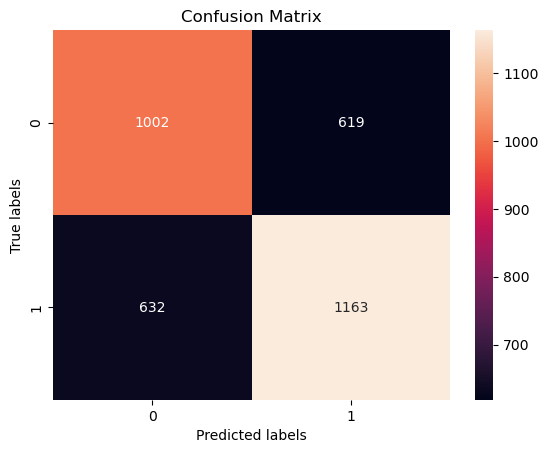

Model: RandomForestClassifier


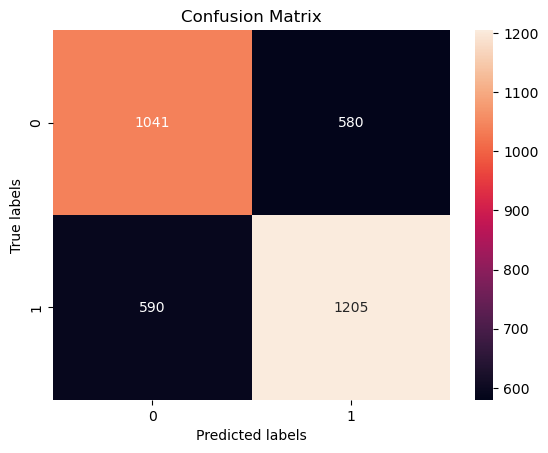

Model: GradientBoostingClassifier


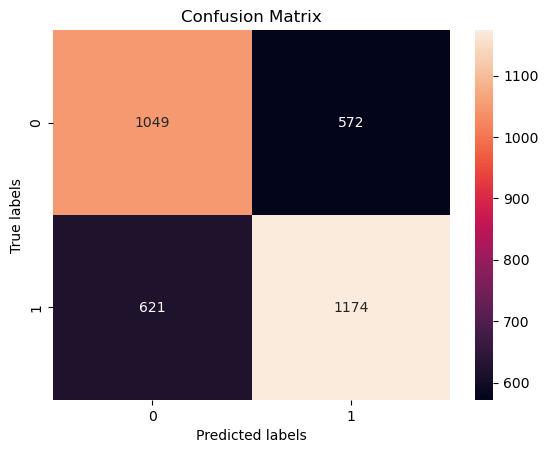

Model: SVC


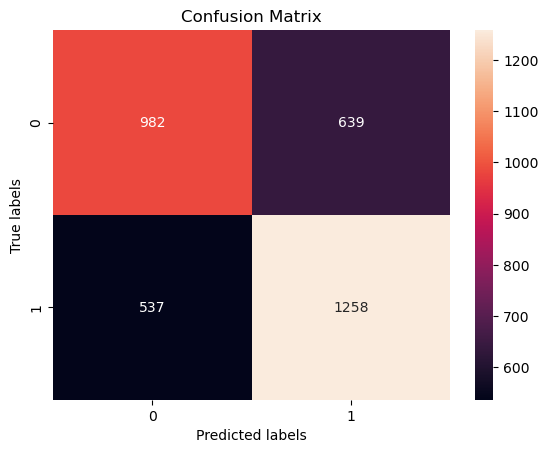

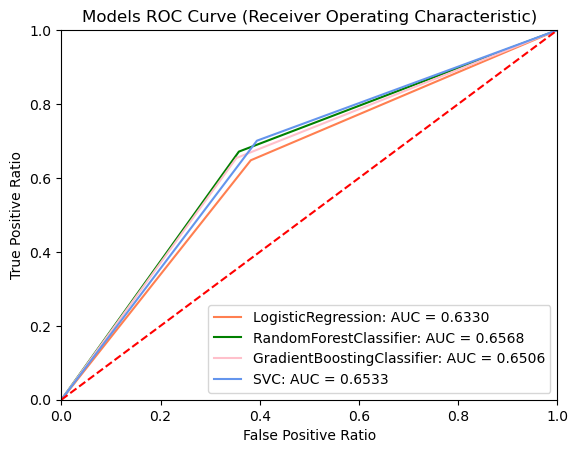

In [103]:
# visualize results using our Standard-Scaled dataset
x_test, y_test = split_scaled_df[1], split_scaled_df[3]
plot_cm_and_roc_from_models(best_models_df_scaled, x_test, y_test)

Confusion Matrix & ROC Curve using our __PCA Dataset__

Model: LogisticRegression


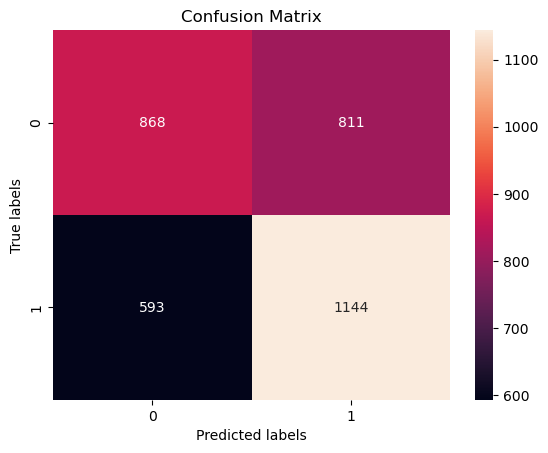

Model: RandomForestClassifier


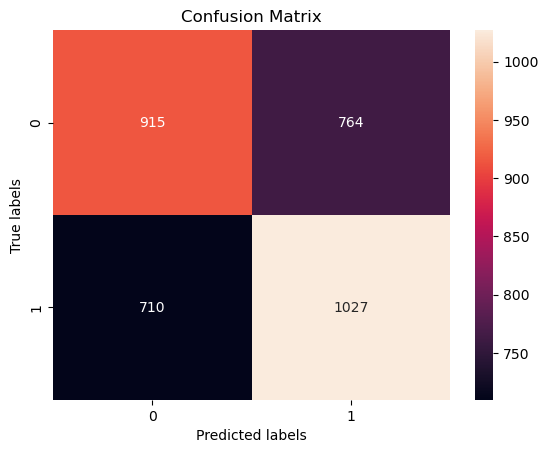

Model: GradientBoostingClassifier


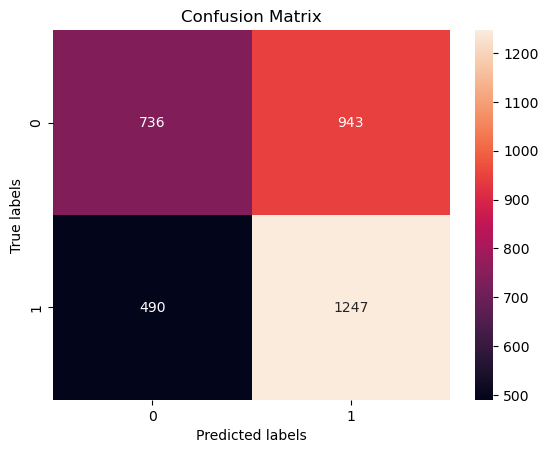

Model: SVC


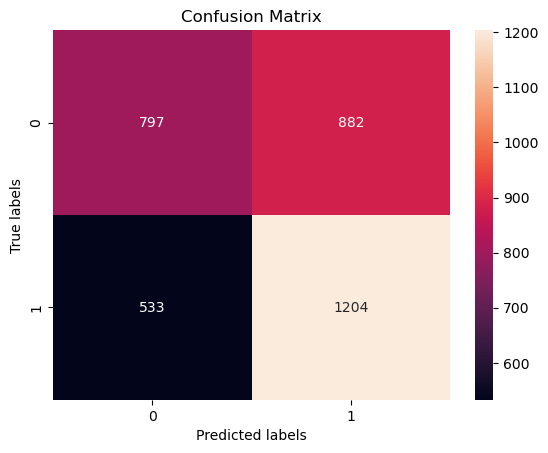

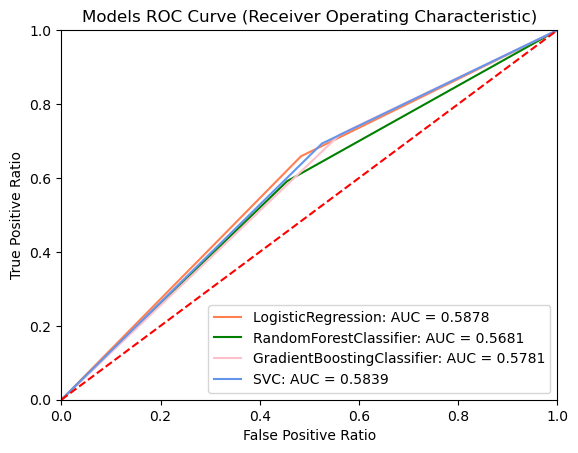

In [104]:
# visualize results using our PCA dataset
x_test, y_test = split_pca_df[1], split_pca_df[3]
plot_cm_and_roc_from_models(best_models_df_pca, x_test, y_test)

Confusion Matrix & ROC Curve using our __LDA Dataset__

Model: LogisticRegression


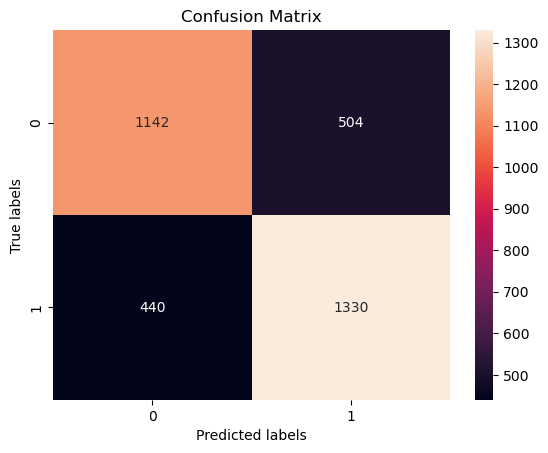

Model: RandomForestClassifier


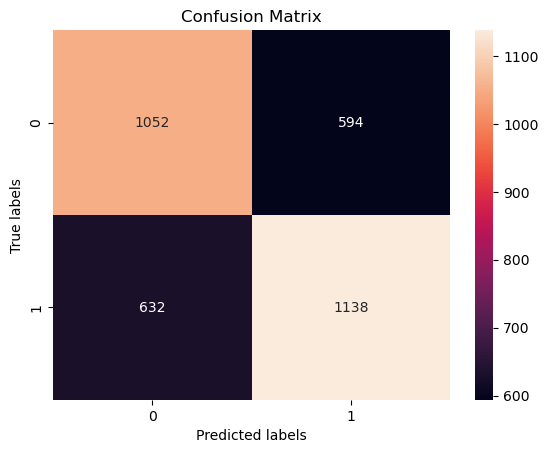

Model: GradientBoostingClassifier


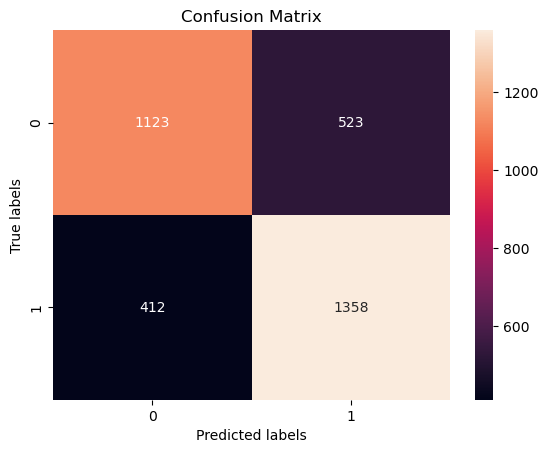

Model: SVC


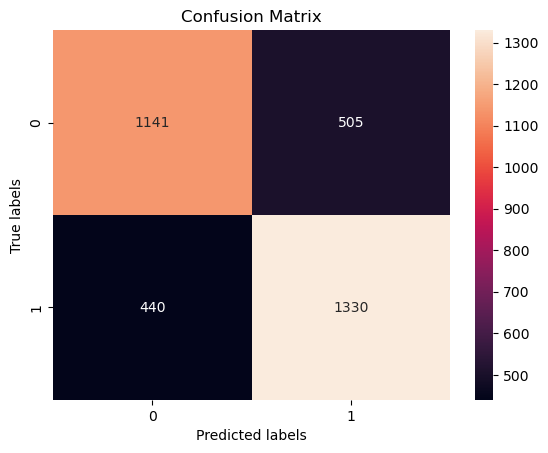

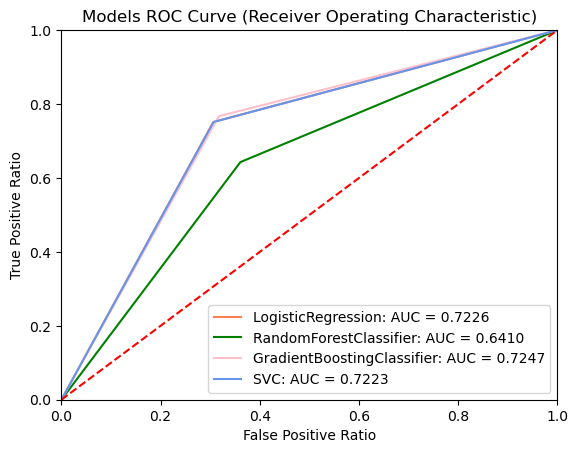

In [105]:
# visualize results using our LDA dataset
x_test, y_test = split_lda_df[1], split_lda_df[3]
plot_cm_and_roc_from_models(best_models_df_lda, x_test, y_test)

Our PCA models show the worst results than the Standard Scaled and LDA datasets.

This may be due to the components not being correlated to our target.

Let's __discard the PCA dataset__.

As we are having __underfitting__ problems, let's try __increasing the complexity of our models.__

__Interaction & polynomial features__

Let's extract features applying:
- __interaction features__: up to 2 degrees for Scaled dataset due to being computational expensive
- __polynomial features__:
    - 2 degrees for Scaled dataset due to being computational expensive
    - 4 degrees for LDA dataset 
    - 6 degrees for LDA dataset

In [106]:
from sklearn.preprocessing import PolynomialFeatures

# function to extract feature interactions from a dataset
def split_dataset_feature_interactions(df, target, degree=2, test_size=0.3):
    interaction = PolynomialFeatures(degree = degree, include_bias=False, interaction_only=True) # degree: max number of features to create
    x = df.drop(target, axis=1)
    y = df[target]
    features_interaction = interaction.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(features_interaction, y, test_size=test_size)
    print('x shape:', x.shape)
    print('y shape:', y.shape)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    print('y_train shape:', y_train.shape)
    print('y_test shape:', y_test.shape)
    return x_train, x_test, y_train, y_test

# function to extract polynomial features from a dataset
def split_dataset_polynomial_features(df, target, degree=2, test_size=0.3):
    polynomial = PolynomialFeatures(degree = degree, include_bias=False, interaction_only=False) # degree: max number of features to create
    x = df.drop(target, axis=1)
    y = df[target]
    features_polynomial = polynomial.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(features_polynomial, y, test_size=test_size)
    print('x shape:', x.shape)
    print('y shape:', y.shape)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    print('y_train shape:', y_train.shape)
    print('y_test shape:', y_test.shape)
    return x_train, x_test, y_train, y_test

Extract __feature interactions__ from our __Standard Scaled dataset__

In [107]:
# split our Standard Scaled dataset extracting feature interactions
x_train, x_test, y_train, y_test = split_dataset_feature_interactions(df_scaled, 'radiant_win')
# hyperparameter tuning on our models
best_models_df_scaled_1 = models_hyperparameter_tuning(models.copy(), param_grids, x_train, x_test, y_train, y_test)

x shape: (17077, 9)
y shape: (17077,)
x_train shape: (11953, 45)
x_test shape: (5124, 45)
y_train shape: (11953,)
y_test shape: (5124,)
Model: LogisticRegression
- Best Hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
- Best Accuracy Score: 62.84 %
- Test Accuracy Score: 62.10 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'sqrt', 'n_estimators': 1000}
- Best Accuracy Score: 63.41 %
- Test Accuracy Score: 64.72 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
- Best Accuracy Score: 64.87 %
- Test Accuracy Score: 65.11 %
Model: SVC
- Best Hyperparameters:  {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
- Best Accuracy Score: 63.59 %
- Test Accuracy Score: 63.91 %


Model: LogisticRegression


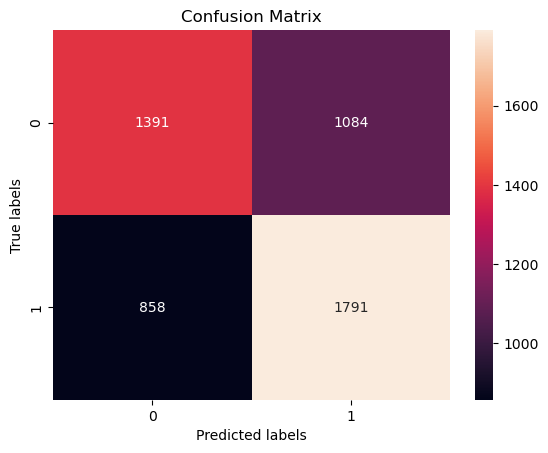

Model: RandomForestClassifier


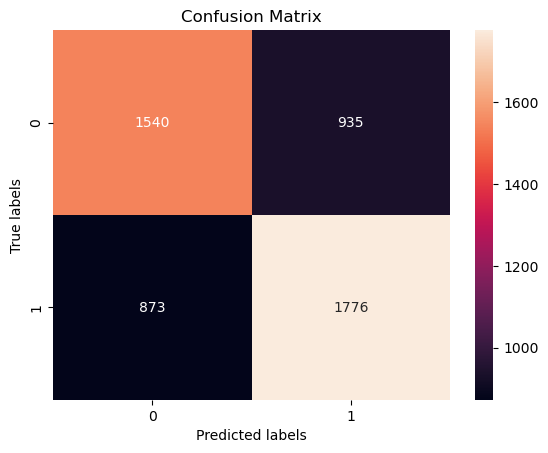

Model: GradientBoostingClassifier


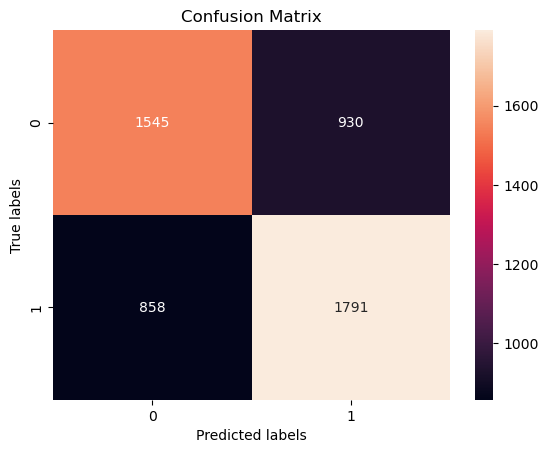

Model: SVC


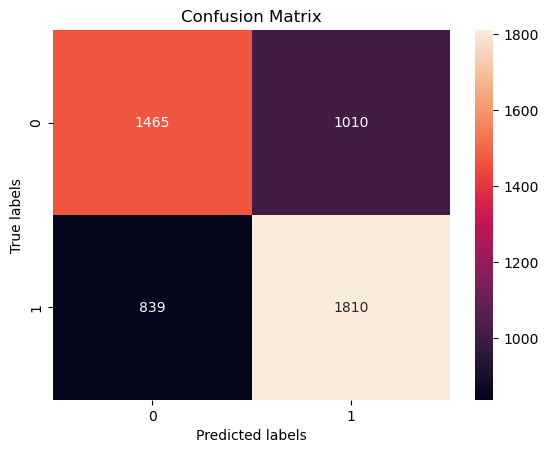

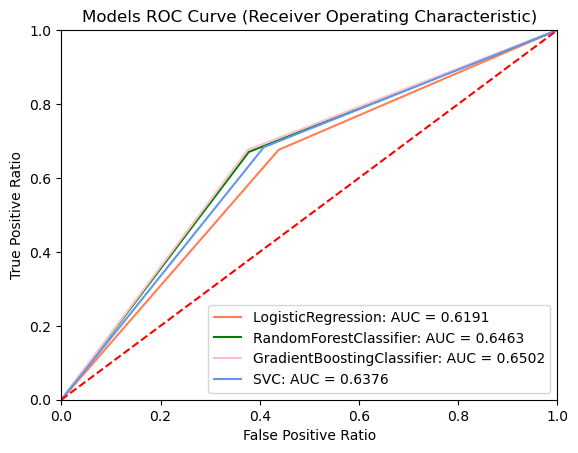

In [108]:
# plot confusion matrixes & roc curves
plot_cm_and_roc_from_models(best_models_df_scaled_1, x_test, y_test)

Extract __polynomial features__ from our __Standard Scaled dataset__

In [109]:
# split our Standard Scaled dataset extracting polynomial features
x_train, x_test, y_train, y_test = split_dataset_polynomial_features(df_scaled, 'radiant_win')
# hyperparameter tuning on our models
best_models_df_scaled_2 = models_hyperparameter_tuning(models, param_grids, x_train, x_test, y_train, y_test)

x shape: (17077, 9)
y shape: (17077,)
x_train shape: (11953, 54)
x_test shape: (5124, 54)
y_train shape: (11953,)
y_test shape: (5124,)
Model: LogisticRegression
- Best Hyperparameters:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
- Best Accuracy Score: 64.15 %
- Test Accuracy Score: 64.64 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'sqrt', 'n_estimators': 1000}
- Best Accuracy Score: 63.62 %
- Test Accuracy Score: 64.58 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
- Best Accuracy Score: 64.51 %
- Test Accuracy Score: 65.63 %
Model: SVC
- Best Hyperparameters:  {'C': 1.0, 'gamma': 0.1, 'kernel': 'linear'}
- Best Accuracy Score: 64.05 %
- Test Accuracy Score: 64.68 %


Model: LogisticRegression


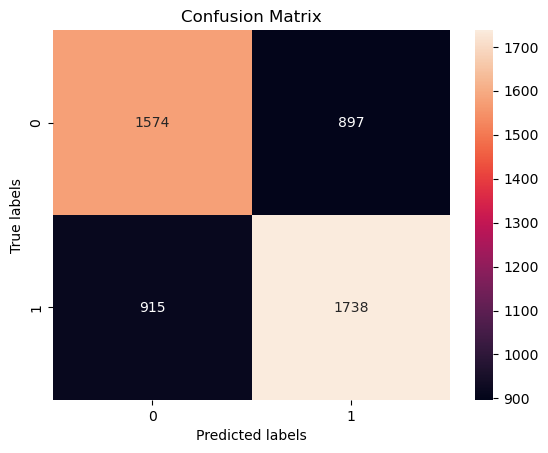

Model: RandomForestClassifier


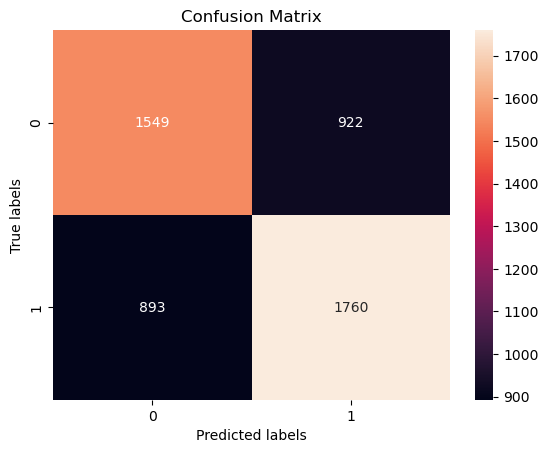

Model: GradientBoostingClassifier


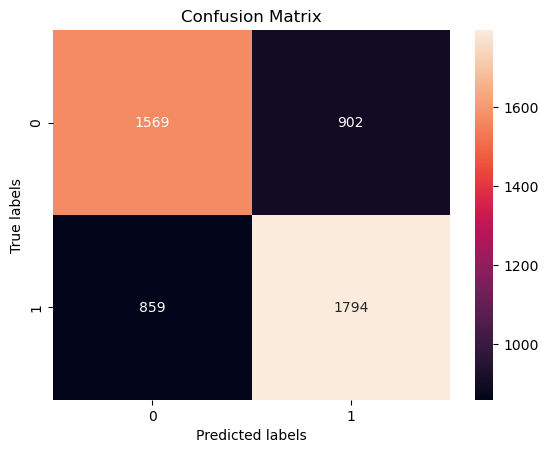

Model: SVC


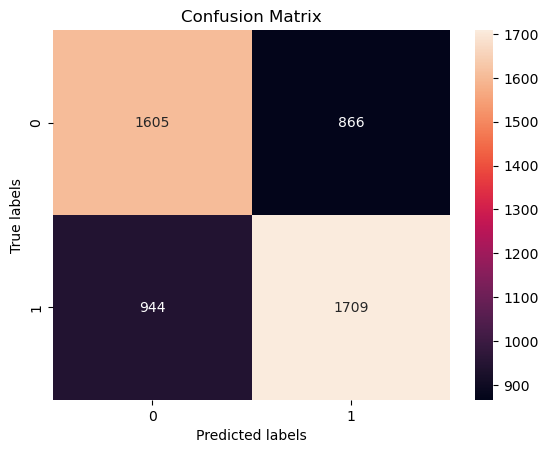

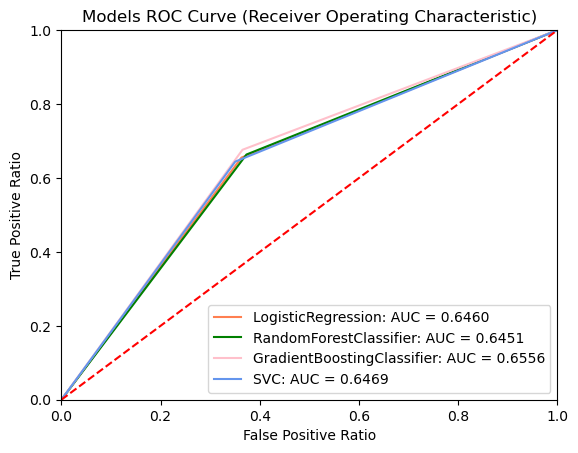

In [110]:
# plot confusion matrixes & roc curves
plot_cm_and_roc_from_models(best_models_df_scaled_2, x_test, y_test)

Extract __polynomial features degree 4__ from our __LDA dataset__

In [112]:
# split our LDA dataset extracting polynomial features
x_train, x_test, y_train, y_test = split_dataset_polynomial_features(lda_df, 'radiant_win', degree=4)
# hyperparameter tuning on our models
best_models_df_lda_1 = models_hyperparameter_tuning(models, param_grids, x_train, x_test, y_train, y_test)

x shape: (17077, 1)
y shape: (17077,)
x_train shape: (11953, 4)
x_test shape: (5124, 4)
y_train shape: (11953,)
y_test shape: (5124,)
Model: LogisticRegression
- Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
- Best Accuracy Score: 72.74 %
- Test Accuracy Score: 70.82 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'sqrt', 'n_estimators': 10}
- Best Accuracy Score: 63.62 %
- Test Accuracy Score: 64.03 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
- Best Accuracy Score: 72.87 %
- Test Accuracy Score: 70.77 %
Model: SVC
- Best Hyperparameters:  {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
- Best Accuracy Score: 72.62 %
- Test Accuracy Score: 70.61 %


Model: LogisticRegression


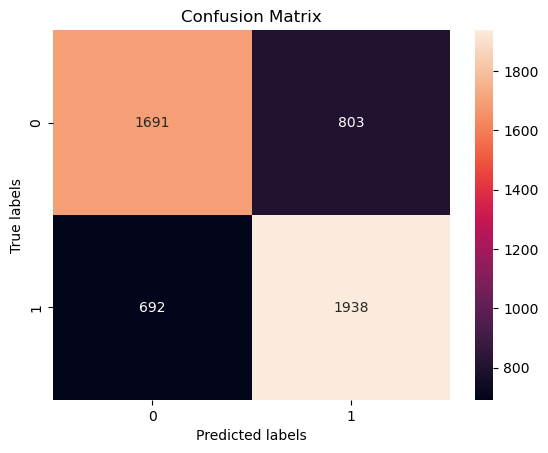

Model: RandomForestClassifier


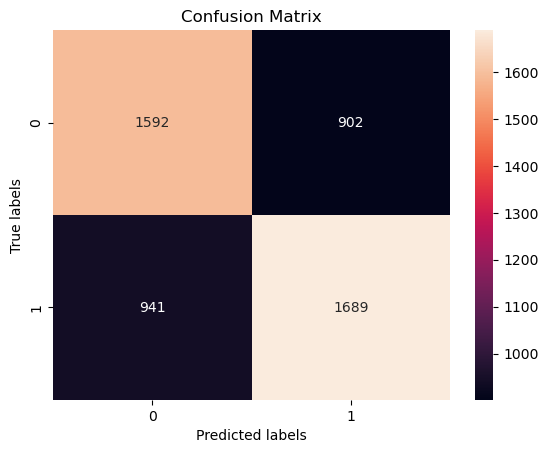

Model: GradientBoostingClassifier


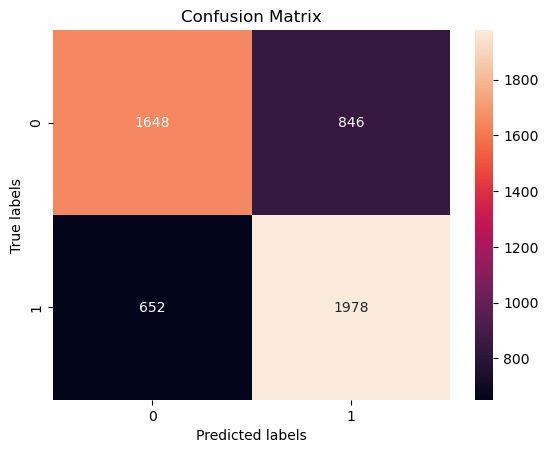

Model: SVC


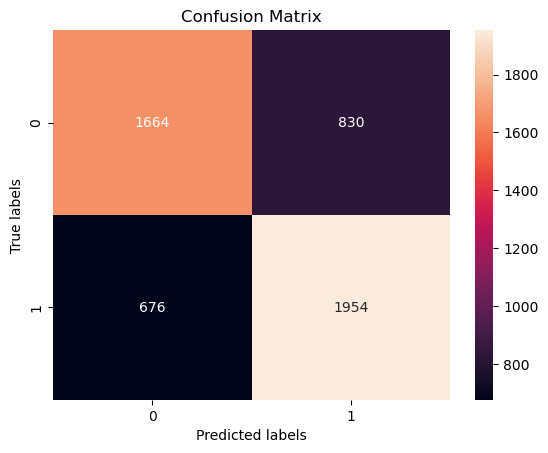

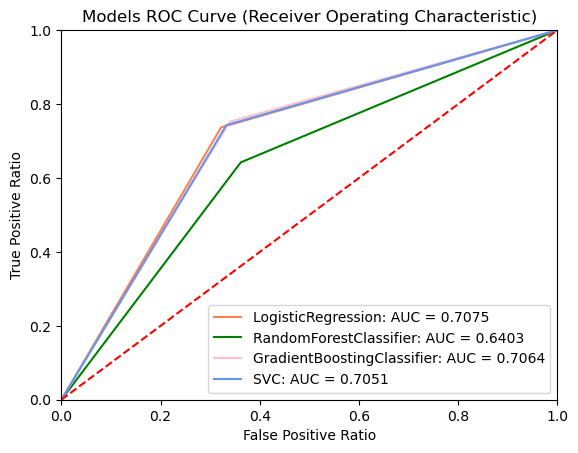

In [113]:
# plot confusion matrixes & roc curves
plot_cm_and_roc_from_models(best_models_df_lda_1, x_test, y_test)

Extract __polynomial features degree 6__ from our __LDA dataset__

In [114]:
# split our LDA dataset extracting polynomial features
x_train, x_test, y_train, y_test = split_dataset_polynomial_features(lda_df, 'radiant_win', degree=6)
# hyperparameter tuning on our models
best_models_df_lda_2 = models_hyperparameter_tuning(models, param_grids, x_train, x_test, y_train, y_test)

x shape: (17077, 1)
y shape: (17077,)
x_train shape: (11953, 6)
x_test shape: (5124, 6)
y_train shape: (11953,)
y_test shape: (5124,)
Model: LogisticRegression
- Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
- Best Accuracy Score: 72.12 %
- Test Accuracy Score: 72.44 %
Model: RandomForestClassifier
- Best Hyperparameters:  {'max_features': 'sqrt', 'n_estimators': 10}
- Best Accuracy Score: 64.13 %
- Test Accuracy Score: 63.15 %
Model: GradientBoostingClassifier
- Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
- Best Accuracy Score: 72.12 %
- Test Accuracy Score: 72.31 %
Model: SVC
- Best Hyperparameters:  {'C': 1.0, 'gamma': 0.1, 'kernel': 'linear'}
- Best Accuracy Score: 72.09 %
- Test Accuracy Score: 72.17 %


Model: LogisticRegression


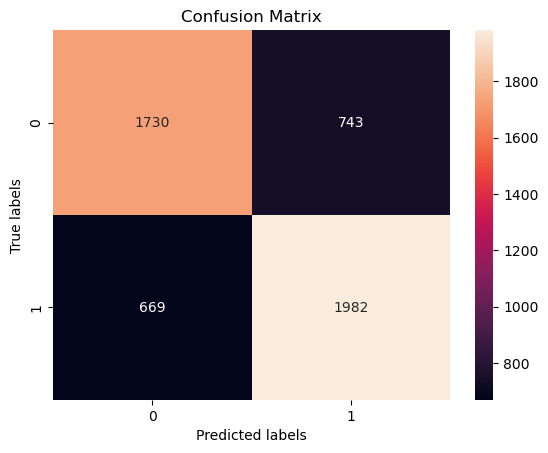

Model: RandomForestClassifier


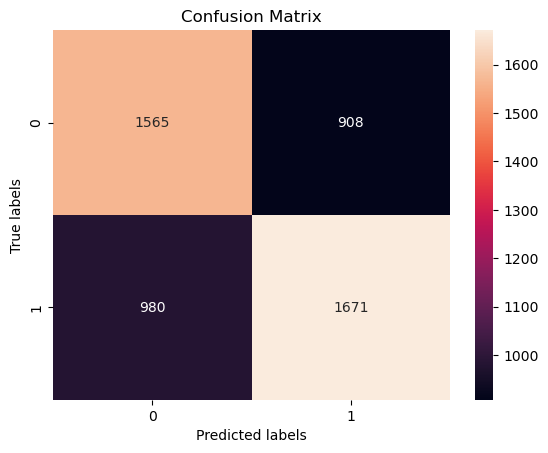

Model: GradientBoostingClassifier


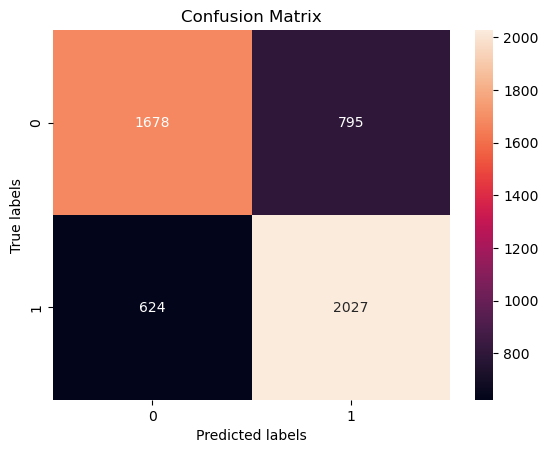

Model: SVC


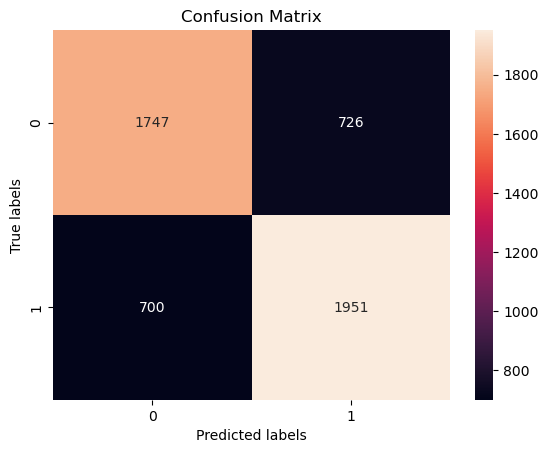

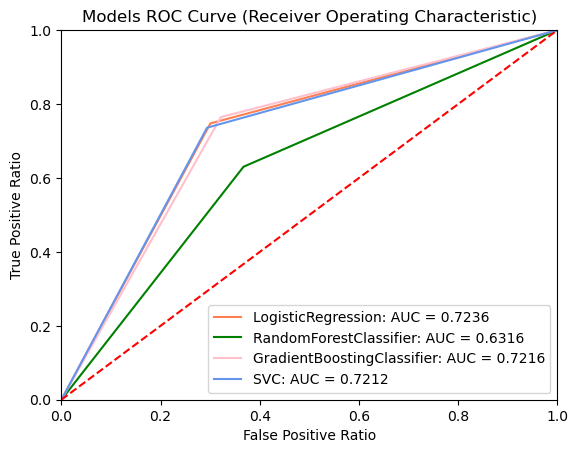

In [115]:
# plot confusion matrixes & roc curves
plot_cm_and_roc_from_models(best_models_df_lda_2, x_test, y_test)

Looking at our results, __most of our Standard Scaled models still look underfitted, as all train & test accuracies are both low (< 66%)__.

On the other hand, models that used LDA with polynomial features of degree 4 have an accuracy of 70%

Even better, using polynomial features up to degree 6 shows the __best test accuracies__ that we have: __72%__ (an __increase of 2% compared to simple models without polynomial features__).

These results indicates that our __initial models were too simple__, by __adding complexity__ we achieved better results.

Let's __discard the Standard-Scaled dataset__ because the results are way lower than using an LDA dataset.

Based on this, we selected the best models (__>**%__) for the next step:
- __Logistic Regression__ using __polynomial features degree 6__ and the __LDA dataset__.
- __Gradient Boosting__ using __polynomial features degree 6__ and the __LDA dataset__.
- __Support Vector Machine__ using __polynomial features degree 6__ and the __LDA dataset__.

In [116]:
# saving only selected best models into another variable
best_models = [best_models_df_lda_2[0]] + list(best_models_df_lda_2[2:])
best_models

[LogisticRegression(C=0.01),
 GradientBoostingClassifier(learning_rate=0.01, subsample=0.5),
 SVC(gamma=0.1, kernel='linear')]

Let's __save them as pickle files.__

In [120]:
import pickle

# save a model as pickle file
def save_model_as_pickle(filename, model):
    save_model = open(filename, 'wb')
    pickle.dump(model, save_model)
    save_model.close()

# save multiple models as pickle files
def save_models(models):
    filenames = []
    for i, model in enumerate(models):
        name = type(model).__name__
        filename = f"{i+1}_{name}.pkl"
        save_model_as_pickle(filename, model)
        filenames.append(filename)
    return filenames
    
save_model_as_pickle('0_LDA.pkl', lda_model)
models_filenames = save_models(best_models)
models_filenames

['1_LogisticRegression.pkl', '2_GradientBoostingClassifier.pkl', '3_SVC.pkl']

### 6. Evaluating the models
To choose a final model, let's __evaluate them using new data (not used for train or test)__, make predictions and compare results.

Let's use a new dataset (also acquired by running our GitHub project to generate the dataset based on API calls to OpenDotaAPI).

Let's polish some functions that we previously defined, and make them work for evaluation purposes (discard the target).

In [127]:
# defining some functions that we previously defined, and make them work for evaluation purposes (discard the target)
# import only required libraries
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures

# function to load a model from a pickle file
def load_model(path):
    return pickle.load(open(path, 'rb'))

# function to change columns into datetime
def convert_columns_to_datatime(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column], unit='s')
        
# function to identify numerical columns within a dataframe
def get_numerical_columns(df):
    numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # set all numeric types
    return df.select_dtypes(include=numeric_types).columns.to_list() # return numeric columns as a list

# function to apply log transformation technique on dataset
def apply_log_transformation(df_original):
    df = df_original.copy() # get a copy of the dataset
    for column in df.columns.to_list(): # apply log transformation to all columns
        df[column] = df[column].map(lambda value : np.log(value) if value > 0 else 0)
    return df

# function to extract features from datetime columns
def extract_features_from_date_columns(df_original):
    df = df_original.copy() # get a copy of the dataset
    df['start_time_month'] = df['start_time'].dt.month
    df['start_time_day'] = df['start_time'].dt.day
    df['start_time_hour'] = df['start_time'].dt.hour
    df['start_time_minute'] = df['start_time'].dt.minute
    df['start_time_week'] = df['start_time'].dt.weekofyear
    df['start_time_weekday'] = df['start_time'].dt.weekday
    df['team1_days_last_match'] = (pd.datetime.today() - df['team1_last_match_time']).dt.days
    df['team2_days_last_match'] = (pd.datetime.today() - df['team2_last_match_time']).dt.days
    return df

# function to scale an entire dataset, returns only numeric columns scaled
def standard_scale_dataset(df):
    # get numerical columns
    numerical_columns = get_numerical_columns(df)
    
    # scale the dataset using a StandardScaler
    scaler = StandardScaler()
    df_numeric = df[numerical_columns]
    df_scaled = scaler.fit_transform(df_numeric.to_numpy())
    df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns.to_list())
    return df_scaled

# function to extract polynomial features from a dataset
def extract_polynomial_features(df, degree=2, test_size=0.3):
    polynomial = PolynomialFeatures(degree=degree, include_bias=False, interaction_only=False)
    features_polynomial = polynomial.fit_transform(df) # x = df, there's no y
    return pd.DataFrame(features_polynomial)

# function to extract lda features from a dataset
def extract_lda_features(df, model_lda):
    # get features applying LDA technique
    features = df.to_numpy()
    features_lda = model_lda.transform(features)
    return features_lda

# define constants about the columns that we affected
COLUMNS_DATETIME = ['start_time', 'team1_last_match_time', 'team2_last_match_time']
COLUMNS_EXTRACTED = ['start_time_month', 'start_time_day', 'start_time_hour', 'start_time_minute',
                     'start_time_week', 'start_time_weekday', 'team1_days_last_match', 'team2_days_last_match']
COLUMNS_OUTLIERS = ['team1_rating', 'team1_wins', 'team2_rating', 'team2_wins', 'team1_player1_gamesPlayed',
 'team1_player1_wins', 'team1_player2_gamesPlayed', 'team1_player2_wins', 'team1_player3_gamesPlayed',
 'team1_player3_wins', 'team1_player4_gamesPlayed', 'team1_player4_wins', 'team1_player5_gamesPlayed',
 'team1_player5_wins', 'team2_player1_gamesPlayed', 'team2_player1_wins', 'team2_player2_gamesPlayed',
 'team2_player2_wins', 'team2_player3_gamesPlayed', 'team2_player3_wins', 'team2_player4_gamesPlayed',
 'team2_player4_wins', 'team2_player5_gamesPlayed', 'team2_player5_wins', 'team1_hero1_gamesPlayed',
 'team1_hero1_wins', 'team1_hero2_gamesPlayed', 'team1_hero2_wins', 'team1_hero3_gamesPlayed',
 'team1_hero3_wins', 'team1_hero4_gamesPlayed', 'team1_hero4_wins', 'team1_hero5_gamesPlayed',
 'team1_hero5_wins', 'team2_hero1_gamesPlayed', 'team2_hero1_wins', 'team2_hero2_gamesPlayed',
 'team2_hero2_wins', 'team2_hero3_gamesPlayed', 'team2_hero3_wins', 'team2_hero4_gamesPlayed',
 'team2_hero4_wins', 'team2_hero5_gamesPlayed', 'team2_hero5_wins']
COLUMNS_DROP = ['radiant_team_id', 'dire_team_id']

Finally we can define our __pipeline__, that uses our __polished functions and constants__ initially used for test & training.

Pipeline:
1. Convert date columns to datetime
2. drop missing values
3. Apply log transformation on columns with outliers
4. Extract new features from datetime columns
5. Apply log transformation on new features
6. Drop uncorrelated columns (below 10%)
7. Standard Scaling
8. Extract Polynomial Features or Feature Interactions
9. Make the predictions

Model: 1_LogisticRegression.pkl
- Acuracy Score Test: 0.6847
- F1 Score Test: 0.7016



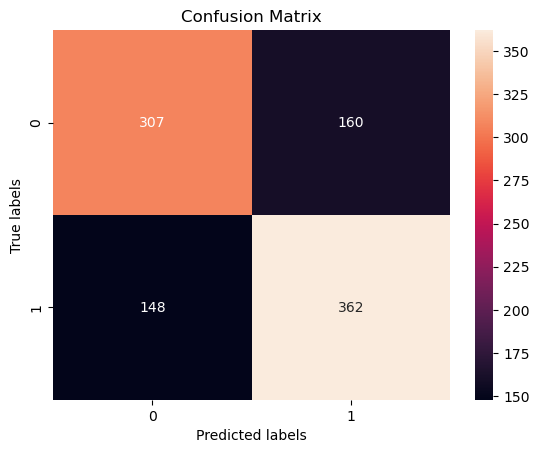

Model: 2_GradientBoostingClassifier.pkl
- Acuracy Score Test: 0.6878
- F1 Score Test: 0.7081



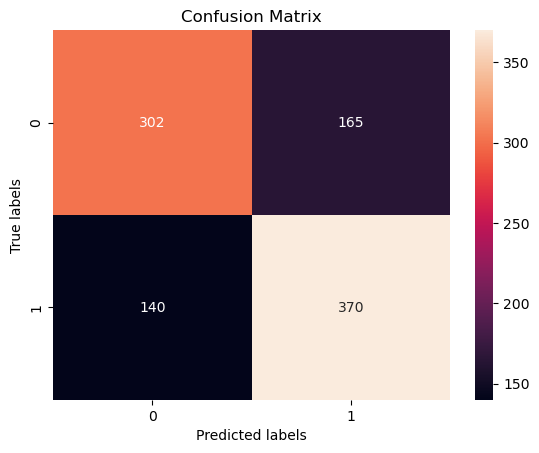

Model: 3_SVC.pkl
- Acuracy Score Test: 0.6868
- F1 Score Test: 0.7012



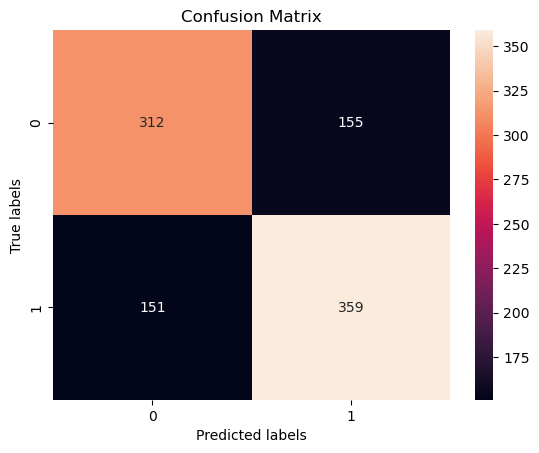

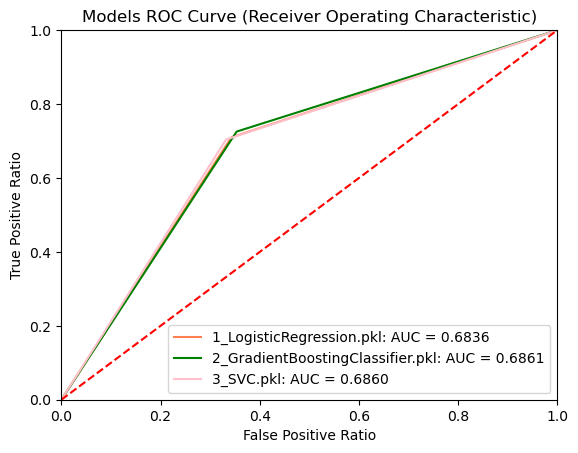

In [129]:
def evaluate_model(df, model_path, lda_model_path):
    
    convert_columns_to_datatime(df, COLUMNS_DATETIME) # convert date columns to datetime
    
    df.dropna(inplace=True) # drop missing values
    
    original_indexes = df.index
    
    df.reset_index(inplace=True, drop=True) # reset indexes after dropping rows
    
    df[COLUMNS_OUTLIERS] = apply_log_transformation(df[COLUMNS_OUTLIERS]) # apply log transformation on columns with outliers
    
    df = extract_features_from_date_columns(df) # extract new features from the datetime columns
    
    df[COLUMNS_EXTRACTED] = apply_log_transformation(df[COLUMNS_EXTRACTED]) # apply log transformation on new features
    
    df_scaled = standard_scale_dataset(df) # apply standard scaling to the dataset (excludes non-numeric columns)
    
    df_scaled.drop(columns=COLUMNS_DROP, axis=1, inplace=True) # drop features correlated between themselves
    
    lda_model_loaded = load_model(lda_model_path) # load the model
    
    lda_df = extract_lda_features(df_scaled, lda_model_loaded) # extract LDA features
    
    complex_df = extract_polynomial_features(lda_df, degree=6) # extract polynomial features
    
    model = load_model(model_path) # load the model
    
    y_pred = model.predict(complex_df) # predict the new data target
    
    return y_pred, original_indexes

def evaluate_multiple_models_with_target(df, target, model_filenames, lda_model_path):
    # loop through models to evaluate them
    names, y_preds = [], []
    
    for i, filename in enumerate(model_filenames):
        print("Model:", filename)
        
        names.append(filename) # save the model name
        
        y_pred, original_indexes = evaluate_model(df.drop(target, axis=1), filename, lda_model_path) # loads the model, goes through the pipeline and predicts on new data
        
        y_preds.append(y_pred) # save predictions
        
        y = df.loc[original_indexes][[target]] # extract only predicted indexes (because we eliminated missing value rows)
        
        display_classifier_metrics(None, None, y, y_pred, test_only=True)
        
        plot_confusion_matrix(y, y_pred) # plot confusion matrix
        
    plot_roc_curve(y, y_preds, names) # plot roc curve

df_evaluation = pd.read_csv('evaluation_1000.csv') # load the new data into a dataframe

lda_model_path = '0_LDA.pkl'

evaluate_multiple_models_with_target(df_evaluation, 'radiant_win', models_filenames, lda_model_path)

The last 3 models show similar results with new data (not used for train & testing).

The best model based on plots and metrics, by very slight advantadge is:

__Gradient Boosting Classifier using the LDA dataset and polynomial features up to degree 6__

__Final Insights:__

Our best models still present some considerable amount of False Postives and False Negatives.

This may be due to the following:
- __quality of the data__: our initial features had roughly 10% or less correlation to our target
- __underfitted model__: we may need even more complex models to get better results (limited by time and cpu resources)
- __hyperparameter tuning__: even though we did hyperparameter tuning, this step can be streched even more, tuning more values and parameters (limited by time and resources)
- __feature explanation__: our goal & value is to predict the match result before it even starts; therefore, our features will describe weak factors about the match

To put into perspective if we used post-match features we could get >80% correlated features to our target. However, analyzing match outcomes after they finished would break the business value and purpose of the project.

Even considering these factors, we have obtained a considerable accuracy of __≈69%__ and __≈71%__ F1-Score, which can help us __predict the outcome of real-life DOTA 2 matches before they even start__.